# Flongle Experiments


In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]


In [4]:
# final ivt vs native
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/061719_R941_NOP58GAL.csv"
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06102019_R941_CBF5GAL.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06112019_R941_CBF5GLU.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/06192019_R941_NOP58GLU.csv"
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/10142019_R941_IVT.csv"
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210410_R941_WT_YPD.csv"
YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210405_R941_mutant448.csv"
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210413_R941_mutant452.csv"
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210415_R941_mutant451.csv"
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210521_R941_WT_stationary.csv"
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210528_R941_trl1d_YPD.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210618_R941_Mix.csv"
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210412_R941_WT_KOAC.csv"
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210414_R941_WT_CY.csv"
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210520_R941_WT_PB.csv"
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210527_R941_Dbp3d_YPD.csv"
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210531_R941_WT_rapa5.csv"
prp43_18deg = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210619_R941_prp43.csv"
ys603_18 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/YS603_18_YEPD_20210717.csv"
mix_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/MIX_20210716.csv"
prp16 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/prp16_18deg_YPD_20210719.csv"
spp382 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/spp382_YPD_20210720.csv"
sqs1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/sqs1d_YPD_20210730.csv"
dbr1d = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/dbr1d_YPD_20210729.csv"
YS602_18 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210722_R941_YS602_18_YPD.csv"
snR4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210823_R941_snR4d_YPD.csv"
snR45 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210824_R941_snR45d_YPD.csv"
YWD448a_2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/20210825_R941_mutant448.csv"

# external experiments
snR34_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323585.csv"
snR3_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323586.csv"
snR36_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323587.csv"
# low coverage for wt1
sno_flongle_wt1 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323588.csv"
sno_flongle_wt2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475631.csv"
snR60_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475632.csv"
snR61_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475633.csv"
snR62_ko = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475634.csv"
# Minion barcoded runs 
sno_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_1.csv"
snr60_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_2.csv"
snr61_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_3.csv"
snr62_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_4.csv"
fraction1_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_1.csv"
fraction2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_2.csv"
fraction3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_3.csv"
fraction4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA442567.bc_4.csv"
temp_stress_control_wt_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_1.csv"
cold_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_2.csv"
heat_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_4.csv"
oxidative_stress_wt_control_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_1.csv"
h2o2_stress_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_2.csv"
oxidative_stress_wt_control_m_f3f4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_3.csv"
h2o2_stress_f3f4_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_4.csv"
snr3_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_1.csv"
snr34_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_2.csv"
snr36_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_3.csv"
sno_control_wt2_m = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_4.csv"



In [15]:
# depletions 1
all_file_paths = [WT_YPD, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, ivt_path]
all_labels = ["1: wild type", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion", "4: ivt"]


In [14]:
# splicing and RNA processing experiments
all_file_paths = [YS602_18, prp16, WT_PB, spp382, sqs1d, dbr1d]
all_labels = ["1YS602_18", "2prp16", "3WT_PB", "4spp382", "5sqs1d", "6dbr1d"]



In [6]:
# # knockouts external
# all_file_paths = [wt2, snR34_ko, snR3_ko, snR36_ko, snR60_ko, snR61_ko, snR62_ko]
# all_labels = ["wt2", "snR34_ko", "snR3_ko", "snR36_ko", "snR60_ko", "snR61_ko", "snR62_ko"]


In [7]:
# flongle mix experiment
# all_file_paths = [WT_YPD, mix, YWD448a, YWD451a, YWD452a, mix_07]
# all_labels = ["1: wild type", "2: mix1", "3: 448a", "4: 451a", "5: 452a", "2: mix2"]


In [8]:
# wild types
# all_labels = ["WT_YPD", "native_nop58_gal_path", "native_cbf5_gal_path", "sno_control_wt_m", 
#               "sno_flongle_wt2", "temp_stress_control_wt_m", "oxidative_stress_wt_control_m",
#              "oxidative_stress_wt_control_m_f3f4", "sno_control_wt2_m"]         
# all_file_paths = [WT_YPD, native_nop58_gal_path, native_cbf5_gal_path, sno_control_wt_m, 
#                   sno_flongle_wt2, temp_stress_control_wt_m, wt_control_m, oxidative_stress_wt_control_m,
#                  oxidative_stress_wt_control_m_f3f4, sno_control_wt2_m]     


In [9]:
# external Sno's
# all_labels = ["sno_control_wt_m", "snr60_m", "snr61_m", "snr62_m", 
#               "sno_flongle_wt2", "snr60_ko", "snr61_ko", "snr62_ko",
#               "snr34_ko", "snr3_ko", "snr36_ko",
#               "snr3_m", "snr34_m", "snr36_m", "sno_control_wt2_m"
#              ]
# all_file_paths = [sno_control_wt_m, snr60_m, snr61_m, snr62_m, 
#                   sno_flongle_wt2, snR60_ko, snR61_ko, snR62_ko,
#                  snR34_ko, snR3_ko, snR36_ko,
#                   snr3_m, snr34_m, snr36_m, sno_control_wt2_m
#                  ]

In [10]:
# fraction experiment
# all_labels = ["WT_YPD", "fraction1_m", "fraction2_m", "fraction3_m", "fraction4_m" ]
# all_file_paths = [WT_YPD, fraction1_m, fraction2_m, fraction3_m, fraction4_m ]

In [11]:
# external experiment conditions
# all_labels = ["temp_stress_control_wt_m", "cold_stress_m", "heat_stress_m", 
#  "oxidative_stress_wt_control_m", "h2o2_stress_m", 
#  "oxidative_stress_wt_control_m_f3f4", "h2o2_stress_f3f4_m"]    
# all_file_paths = [temp_stress_control_wt_m, cold_stress_m, heat_stress_m, 
#  oxidative_stress_wt_control_m, h2o2_stress_m, 
#  oxidative_stress_wt_control_m_f3f4, h2o2_stress_f3f4_m]


In [23]:
# all_file_paths = [snR4, snR45, nop58_glu_2o_depletion_path]
# all_labels = ["snR4", "snR45", "NOP58 2'O-Methyl depletion"]
# all_file_paths = [snR4, snR45]
# all_labels = ["snR4", "snR45"]

In [24]:
# all_file_paths = [WT_YPD, prp43_18deg, YS602_18, prp16, spp382, sqs1d, dbr1d, Dbp3d_YPD]
# all_labels = ["1: wild type", "3: prp43_18deg", "2: ys602_18", "4: prp16", "5: spp382", "6: sqs1d", "7: dbr1d", "8: Dbp3d_YPD"]


In [5]:
# all_file_paths = [native_nop58_gal_path, native_cbf5_gal_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, ivt_path, WT_YPD, YWD448a, YWD452a, YWD451a, WT_stationary, trl1d_YPD, mix, WT_KOAC, WT_CY, WT_PB, Dbp3d_YPD, WT_rapa5, prp43_18deg, ys603_18, mix_07, prp16, spp382, sqs1d, dbr1d, YS602_18, snR4, snR45, YWD448a_2] 
# all_labels = ["native_nop58_gal_path", "native_cbf5_gal_path", "cbf5_glu_psu_depletion_path", "nop58_glu_2o_depletion_path", "ivt_path", "WT_YPD", "YWD448a", "YWD452a", "YWD451a", "WT_stationary", "trl1d_YPD", "mix", "WT_KOAC", "WT_CY", "WT_PB", "Dbp3d_YPD", "WT_rapa5", "prp43_18deg", "ys603_18", "mix_07", "prp16", "spp382", "sqs1d", "dbr1d", "YS602_18", "snR4", "snR45", "YWD448a_2"]


In [15]:
# vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")
vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


In [ ]:
# vc.write_experiment_percent_modified("/Users/andrewbailey/CLionProjects/rrna_analysis/summary_data/all_experiment_mod_percents.csv")

In [7]:
# output_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/summary_data/all_experiment_correlations.csv"
# vc.write_correlations(output_path, stat="spearman")


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/andrewbailey/anacon

True

<IPython.core.display.Javascript object>


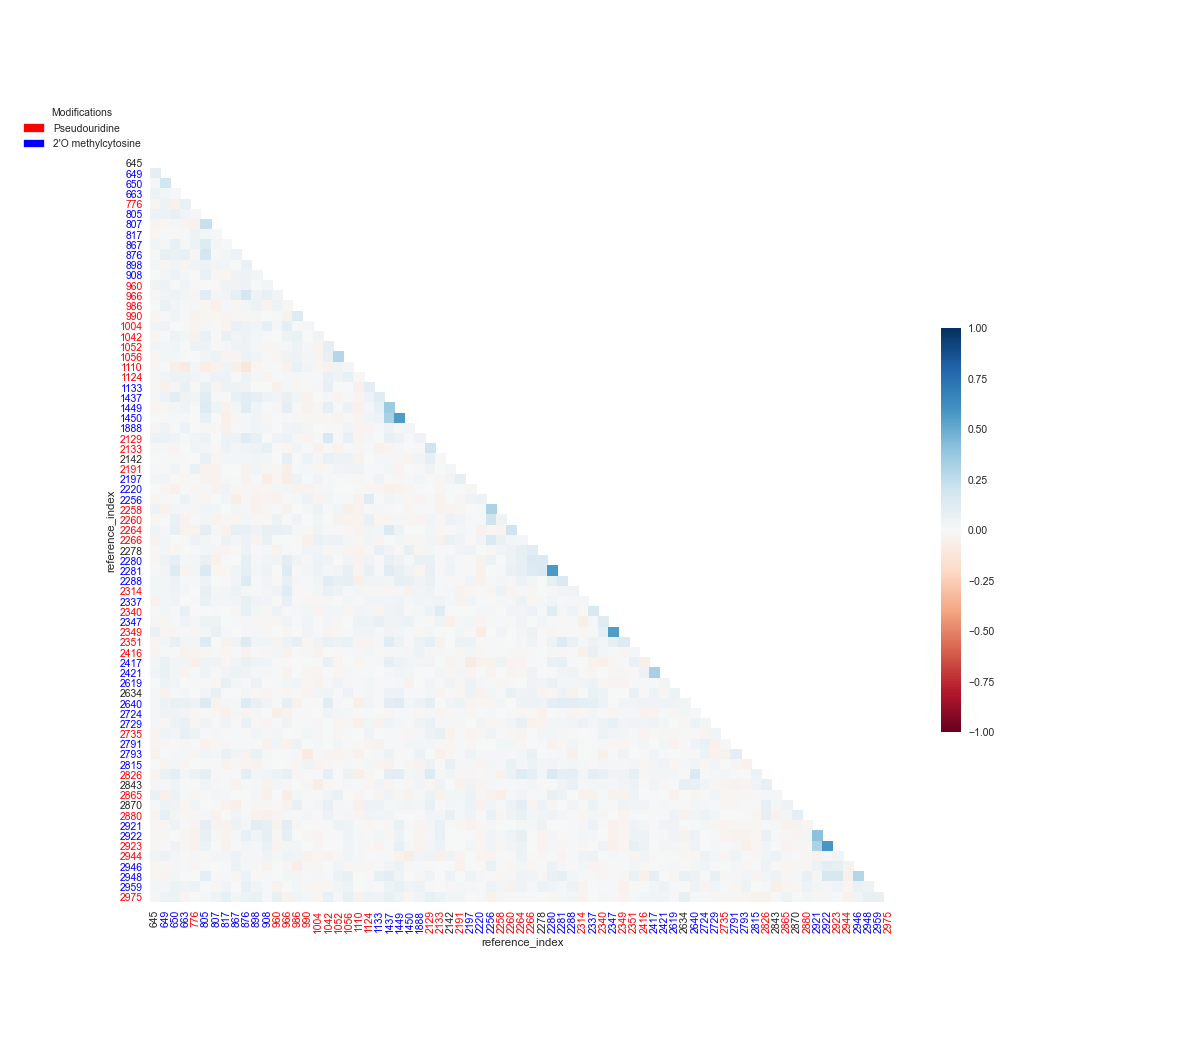

<IPython.core.display.Javascript object>


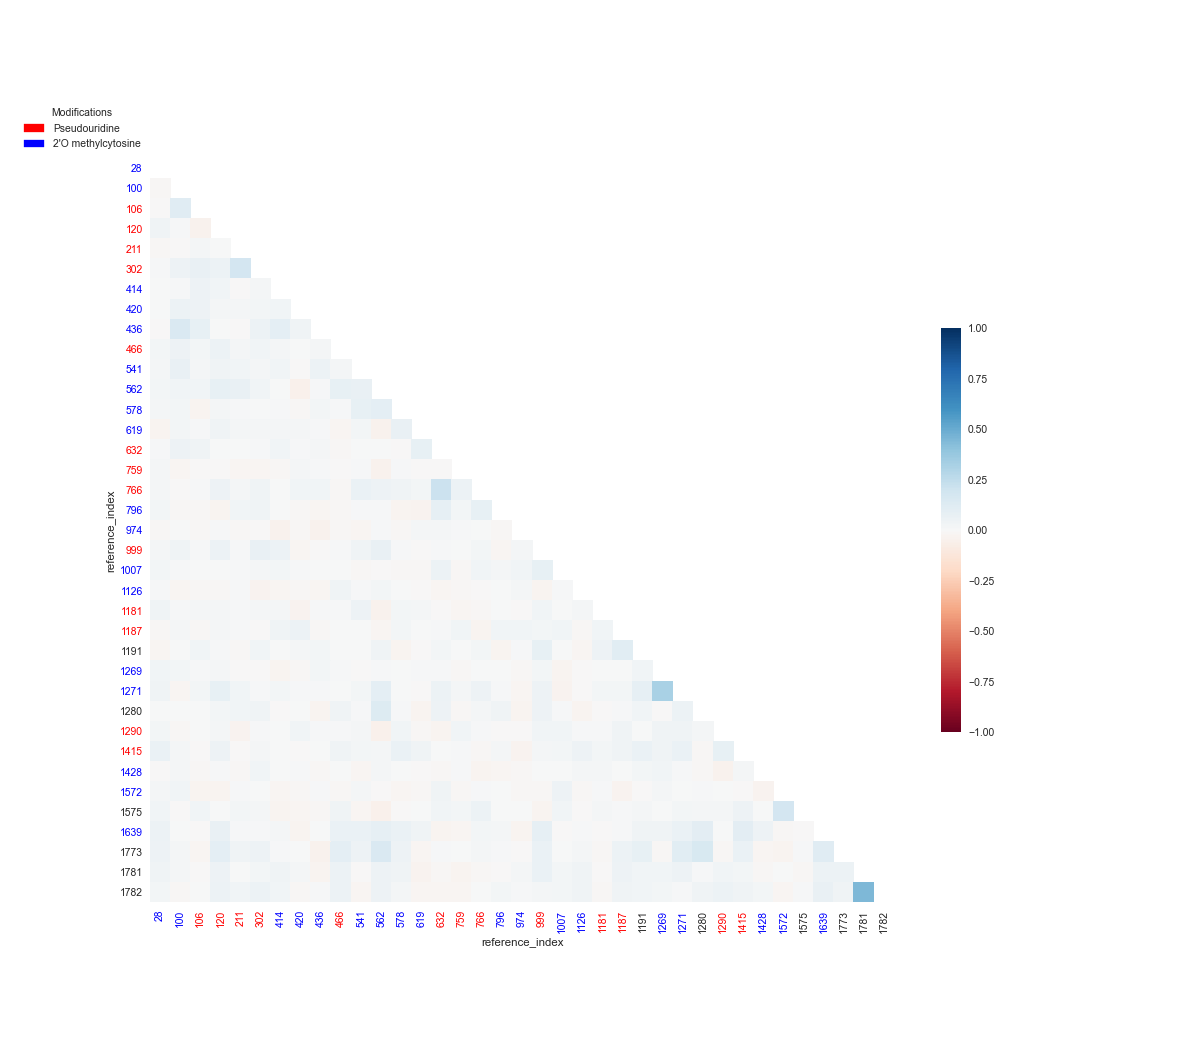

<IPython.core.display.Javascript object>


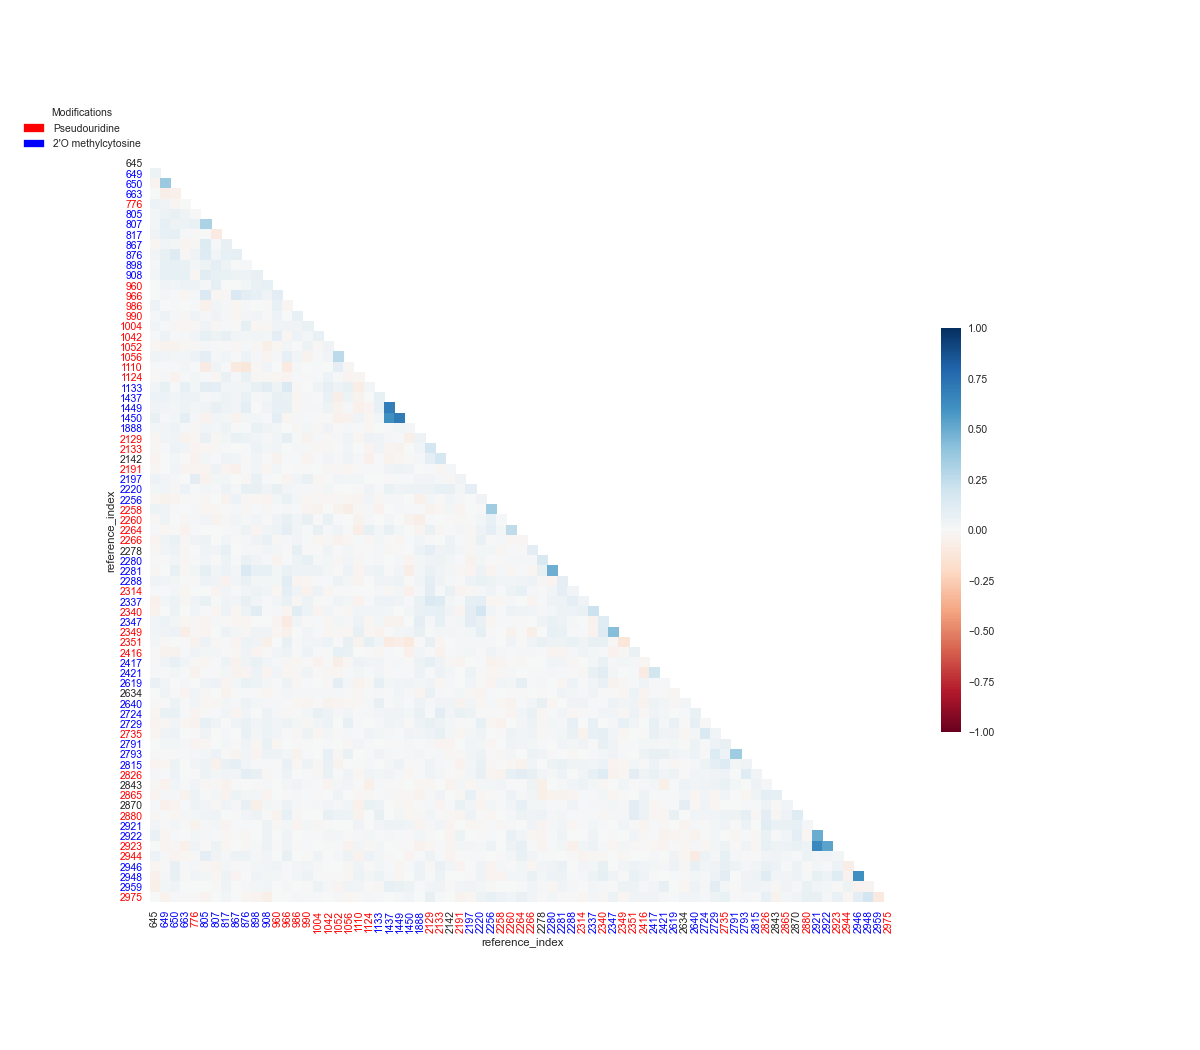

<IPython.core.display.Javascript object>


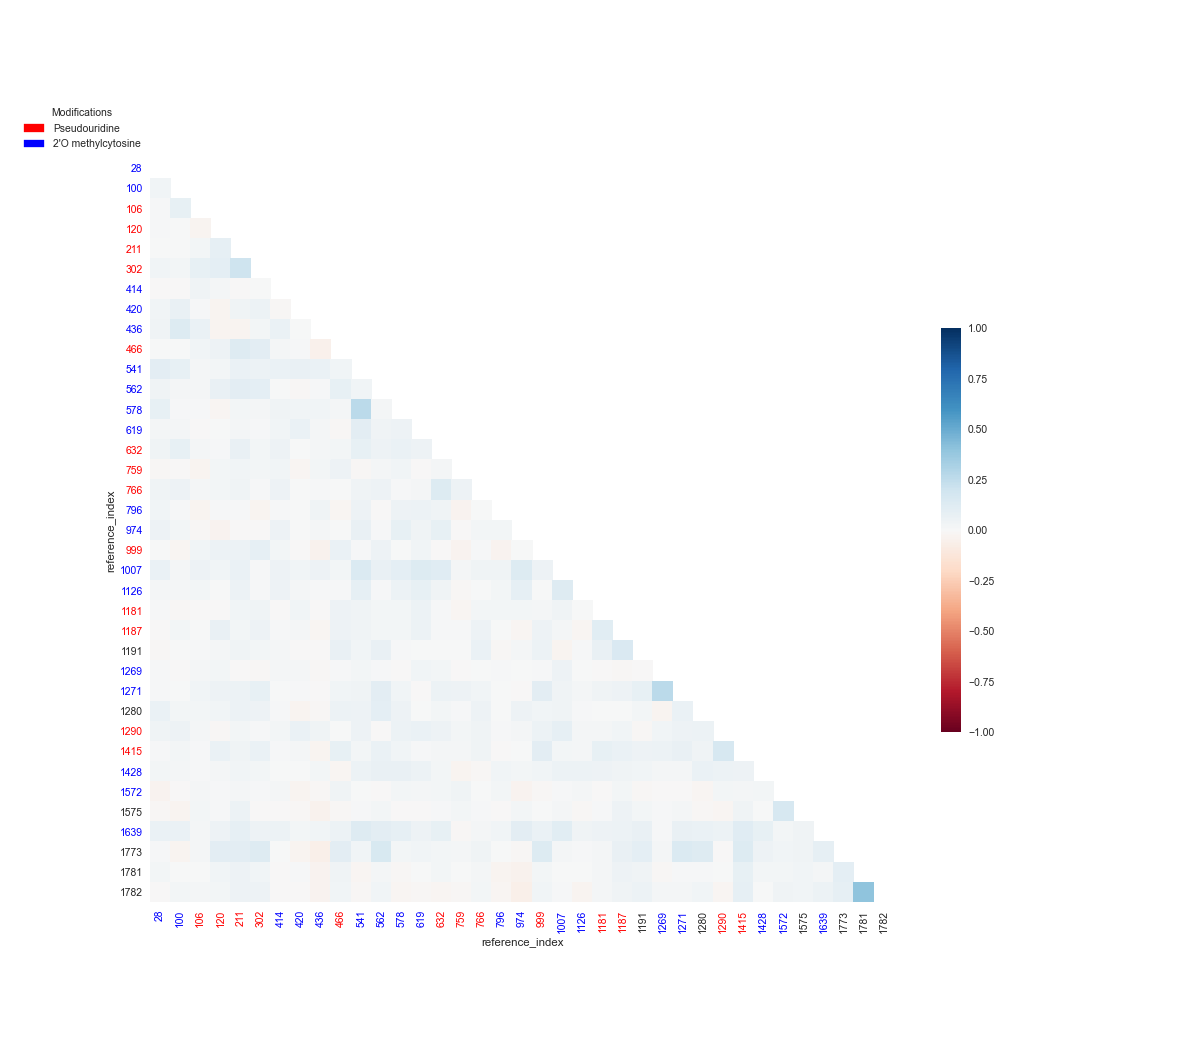

<IPython.core.display.Javascript object>


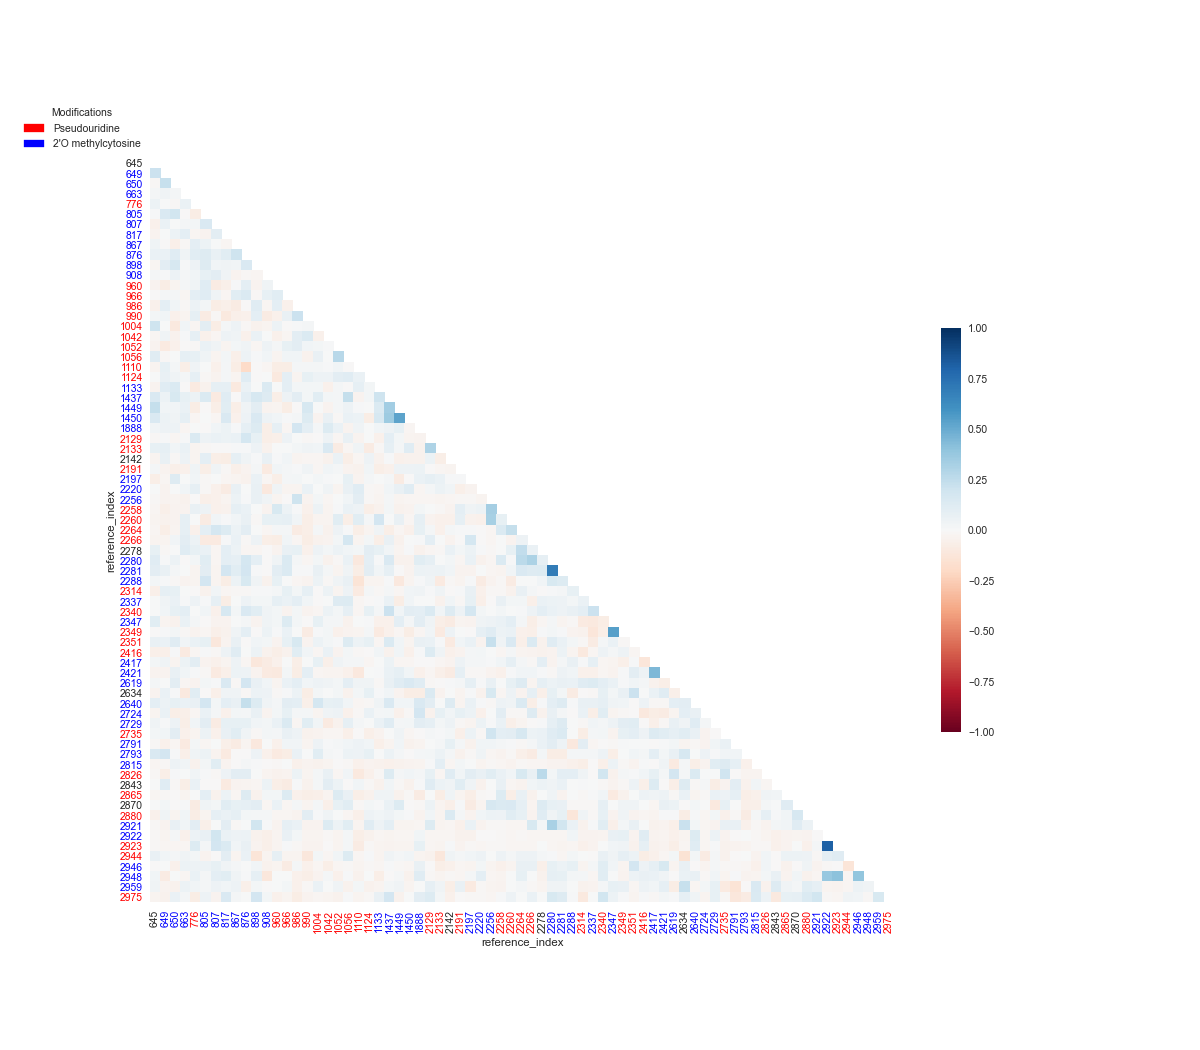

<IPython.core.display.Javascript object>


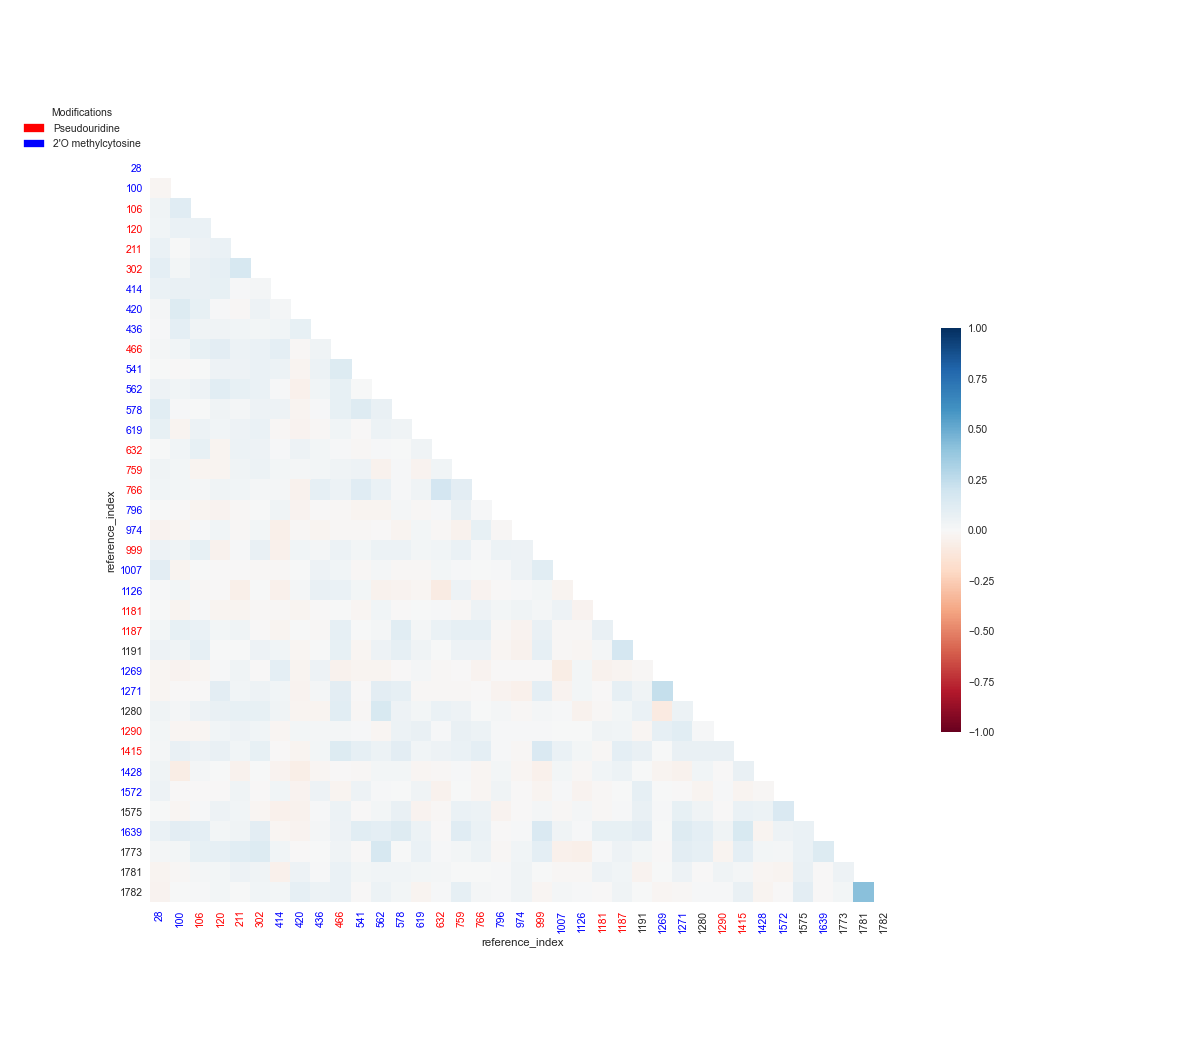

<IPython.core.display.Javascript object>


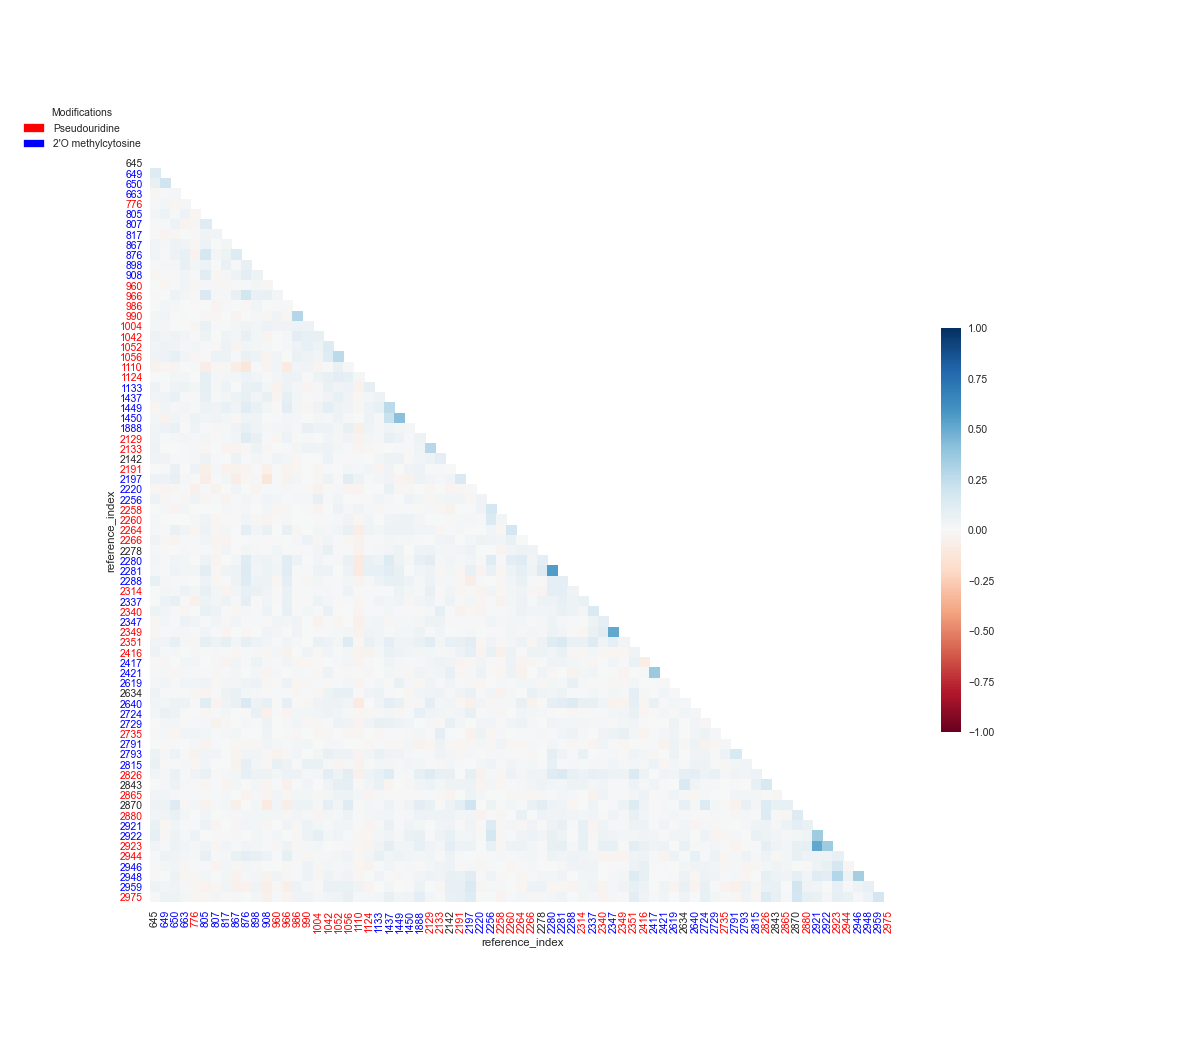

<IPython.core.display.Javascript object>


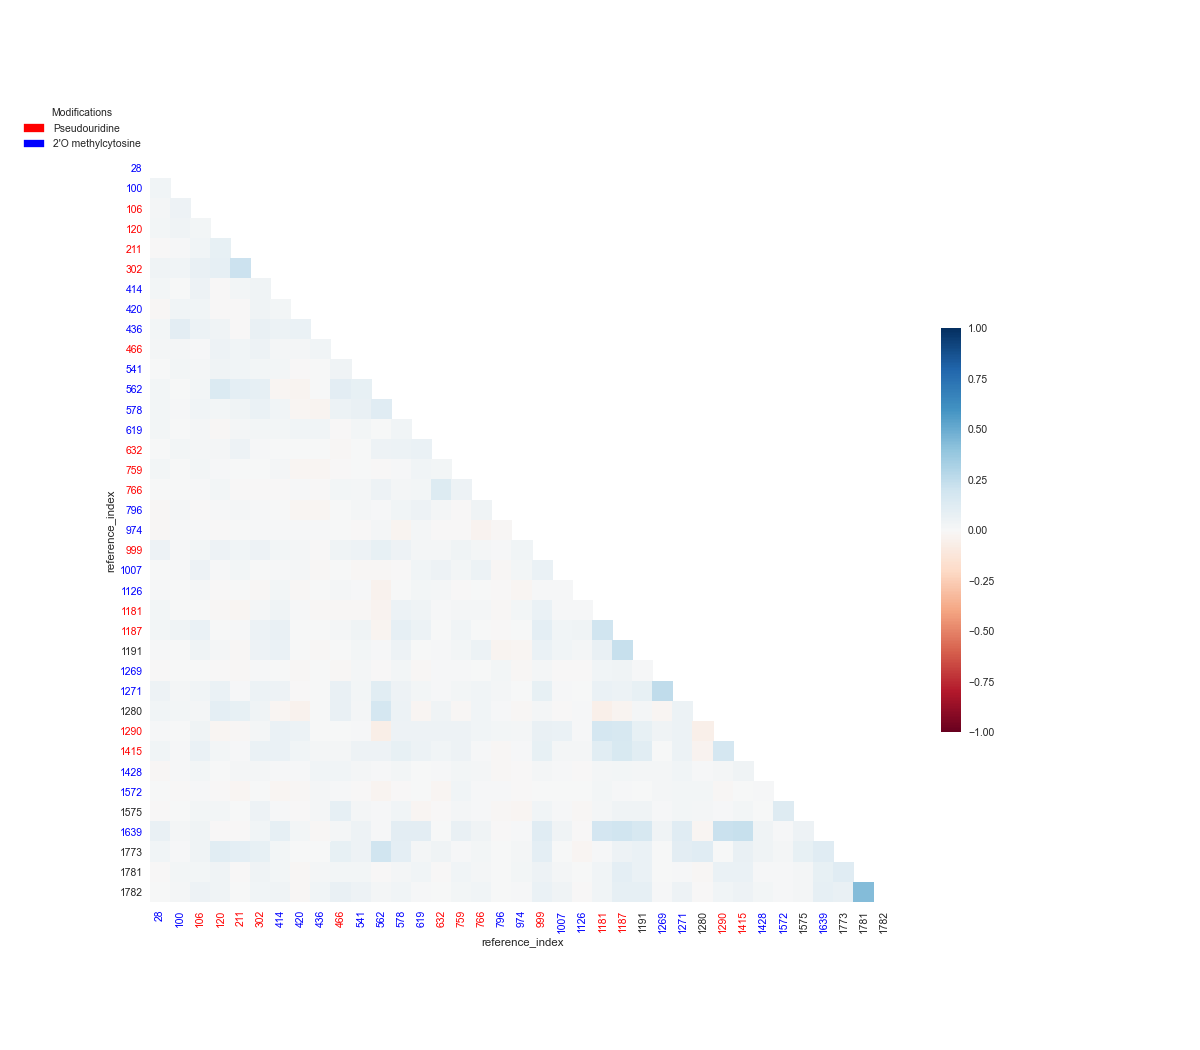

<IPython.core.display.Javascript object>


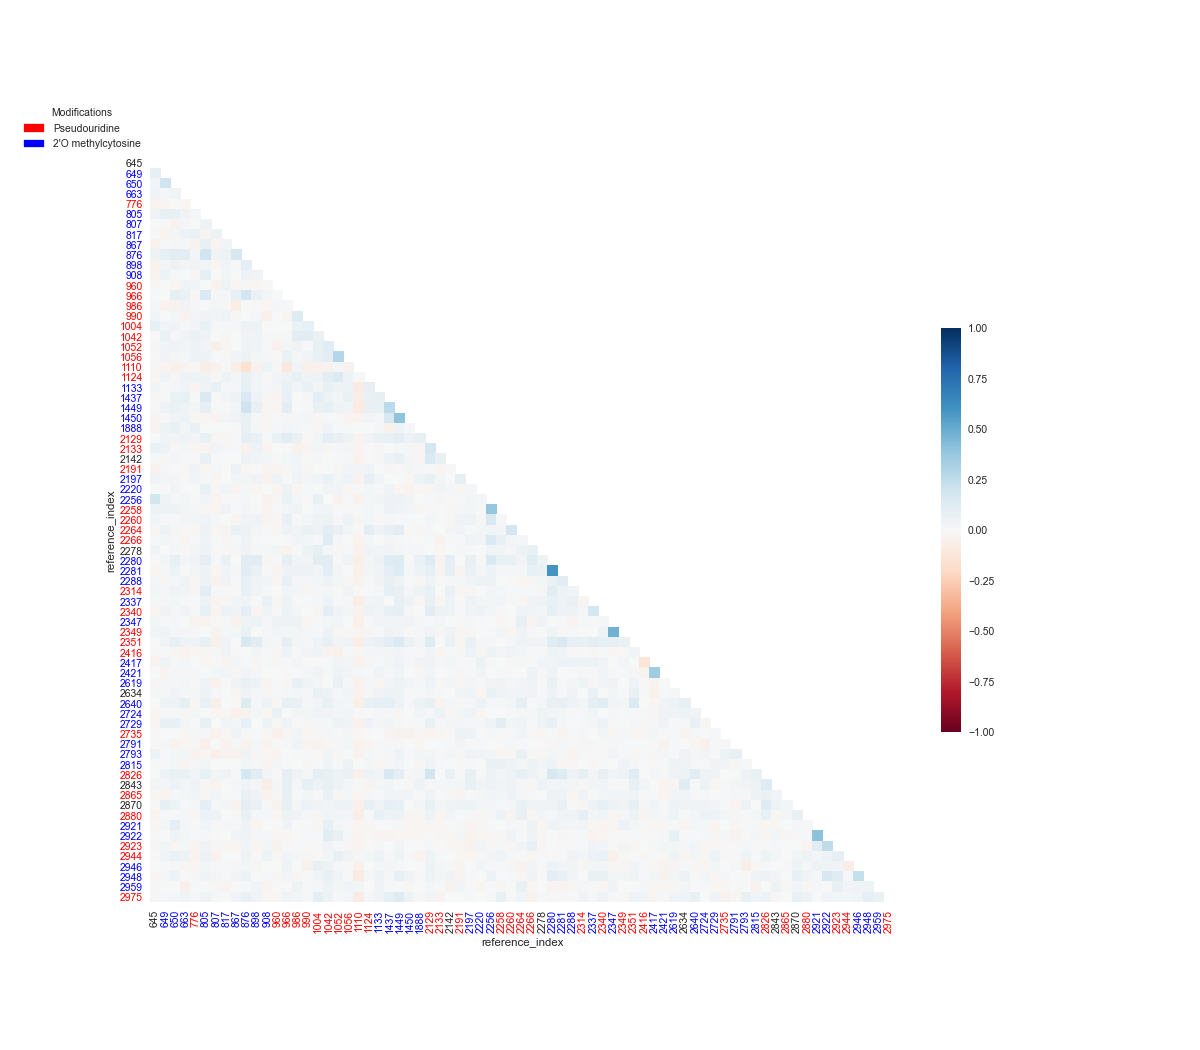

<IPython.core.display.Javascript object>


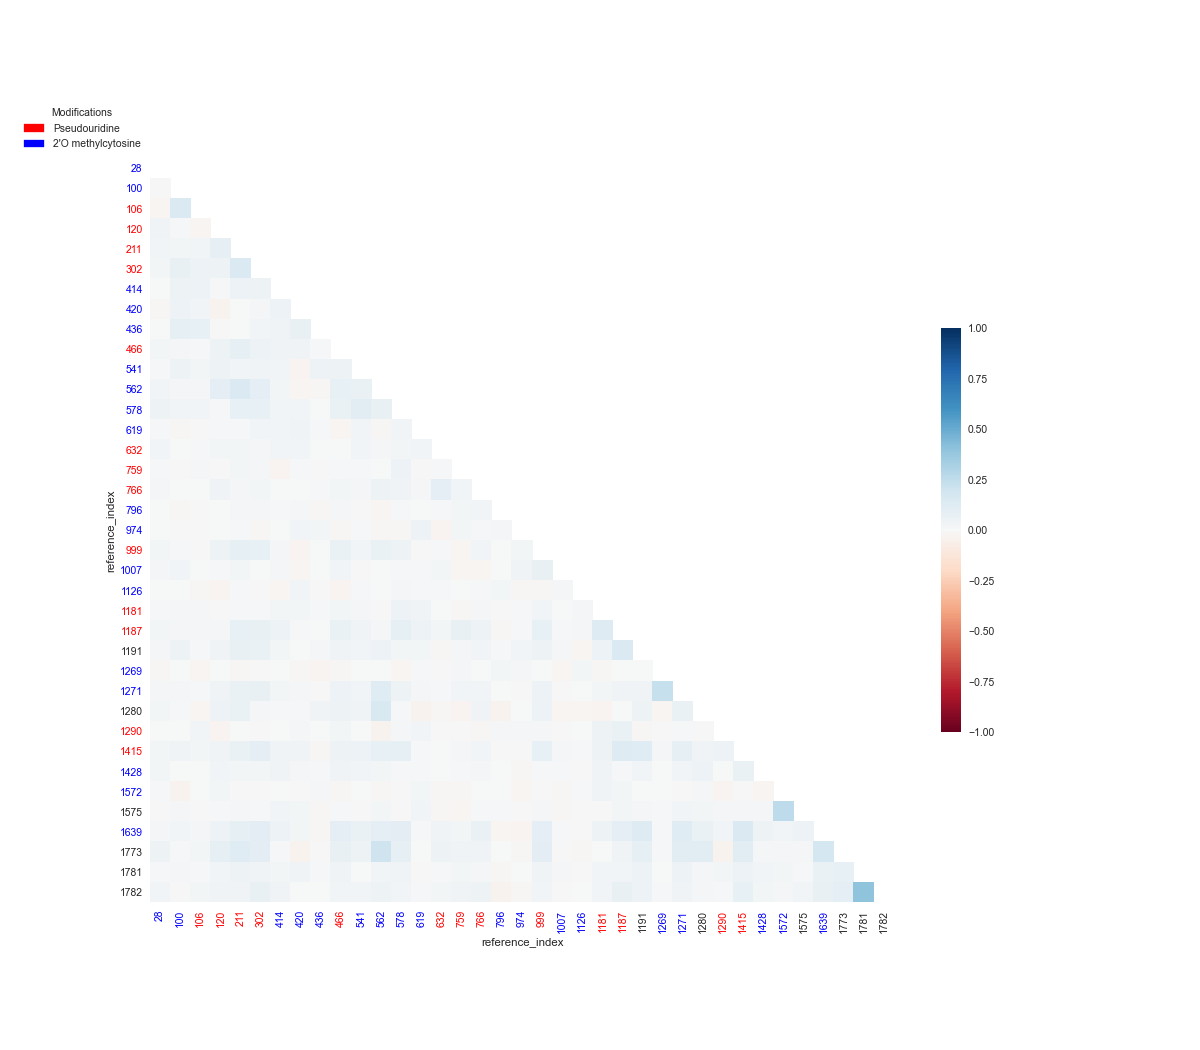

<IPython.core.display.Javascript object>


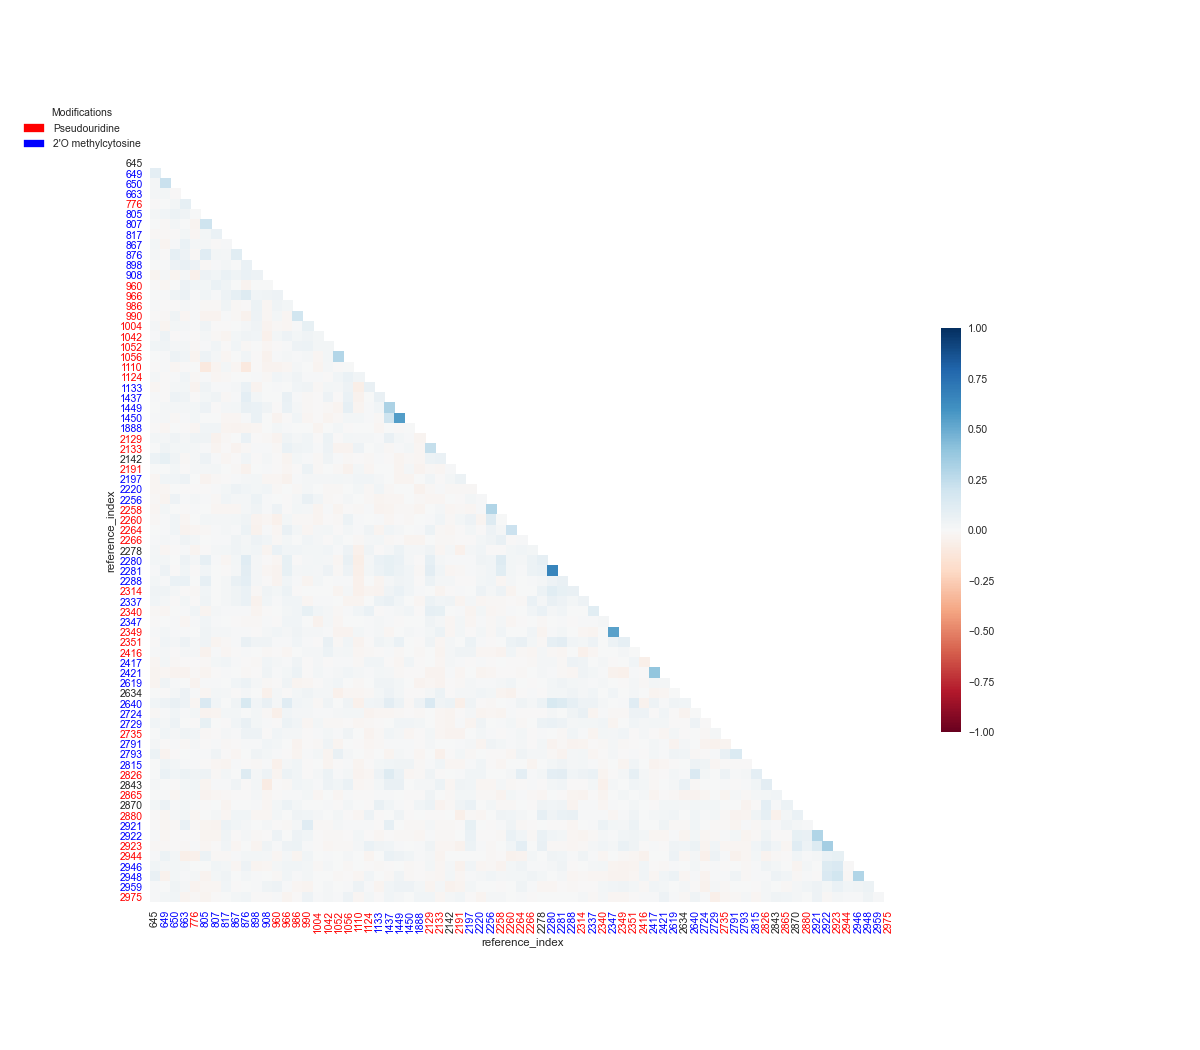

<IPython.core.display.Javascript object>


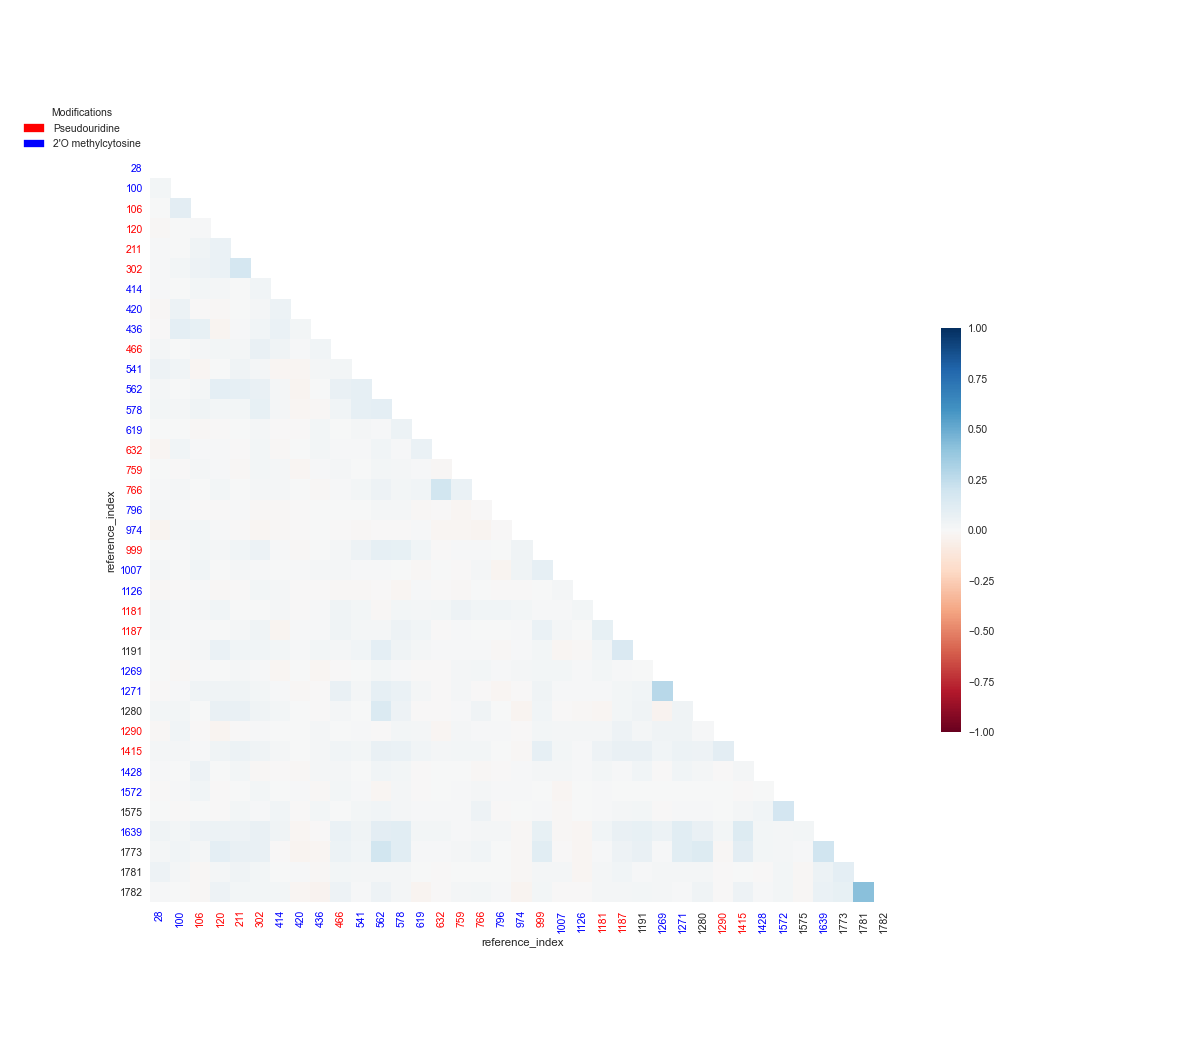

<IPython.core.display.Javascript object>


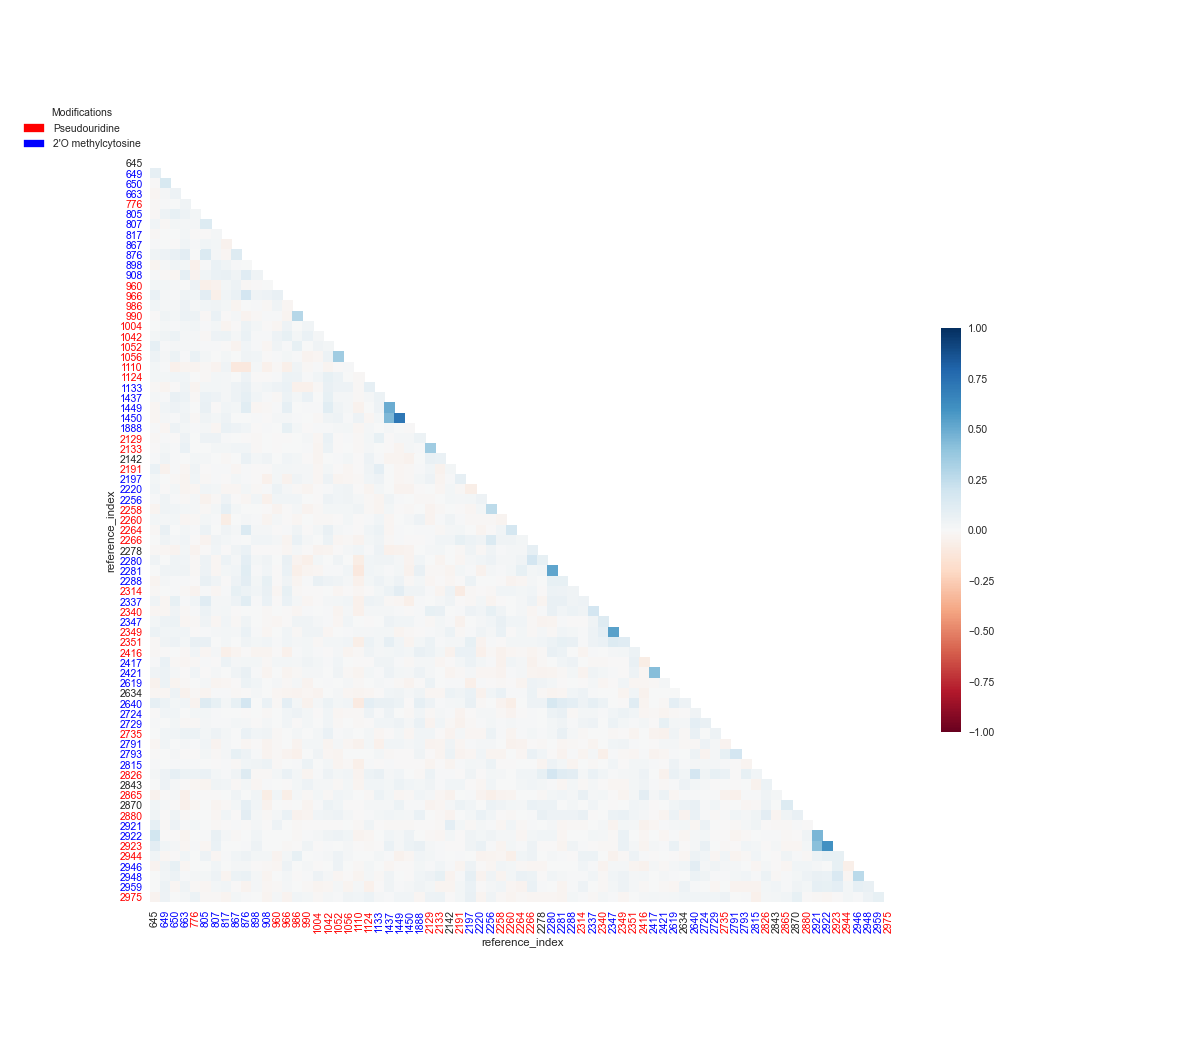

<IPython.core.display.Javascript object>


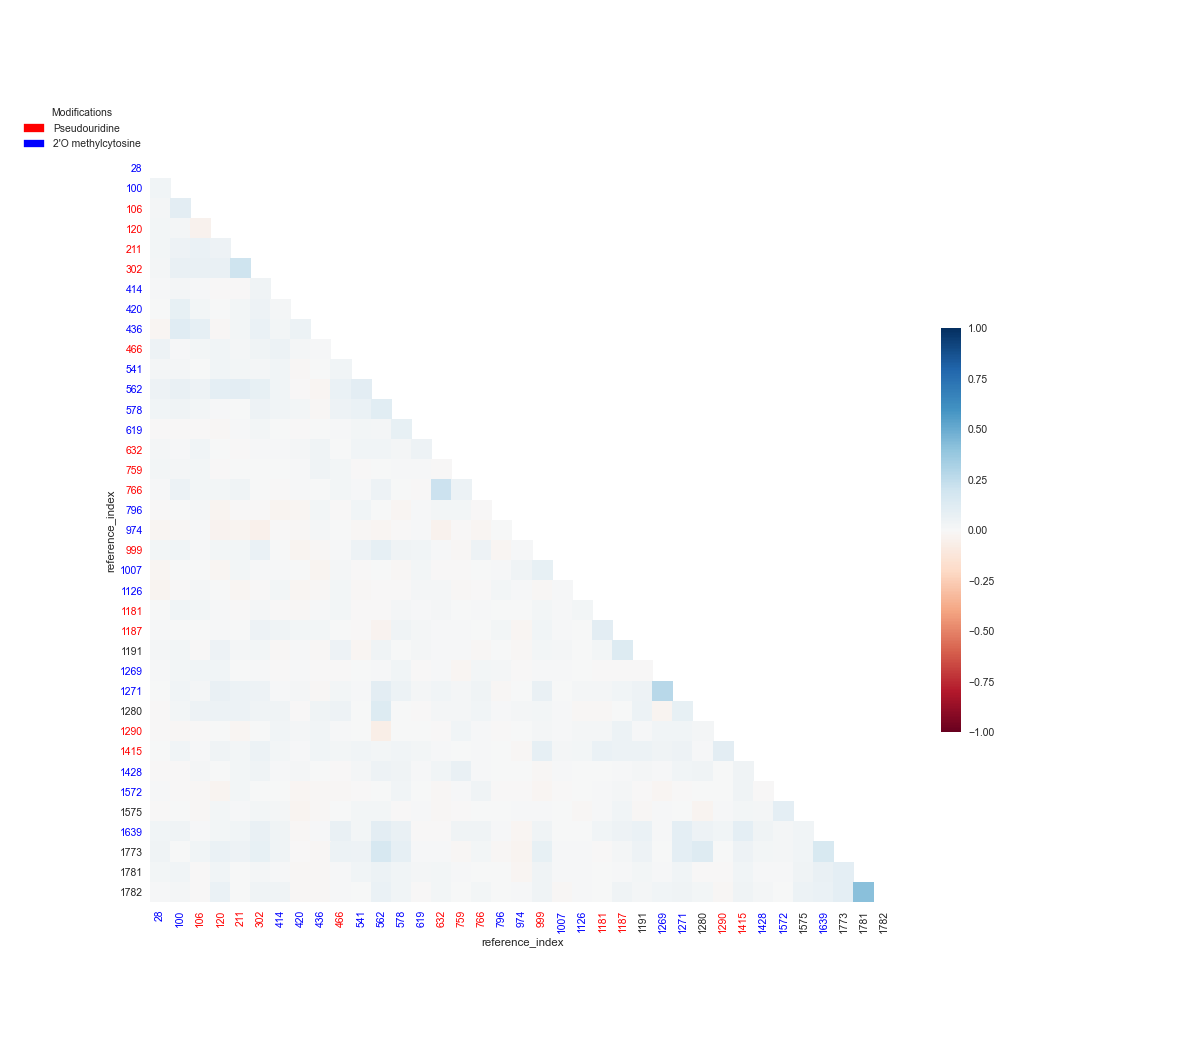

In [12]:
# output_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/summary_data/correlation_plots"
# output_path = "/Users/andrewbailey/Desktop/recent_experiments/"
# vc.plot_all_plot_ld_heatmap(output_path, vmax=1, vmin=-1)

<IPython.core.display.Javascript object>


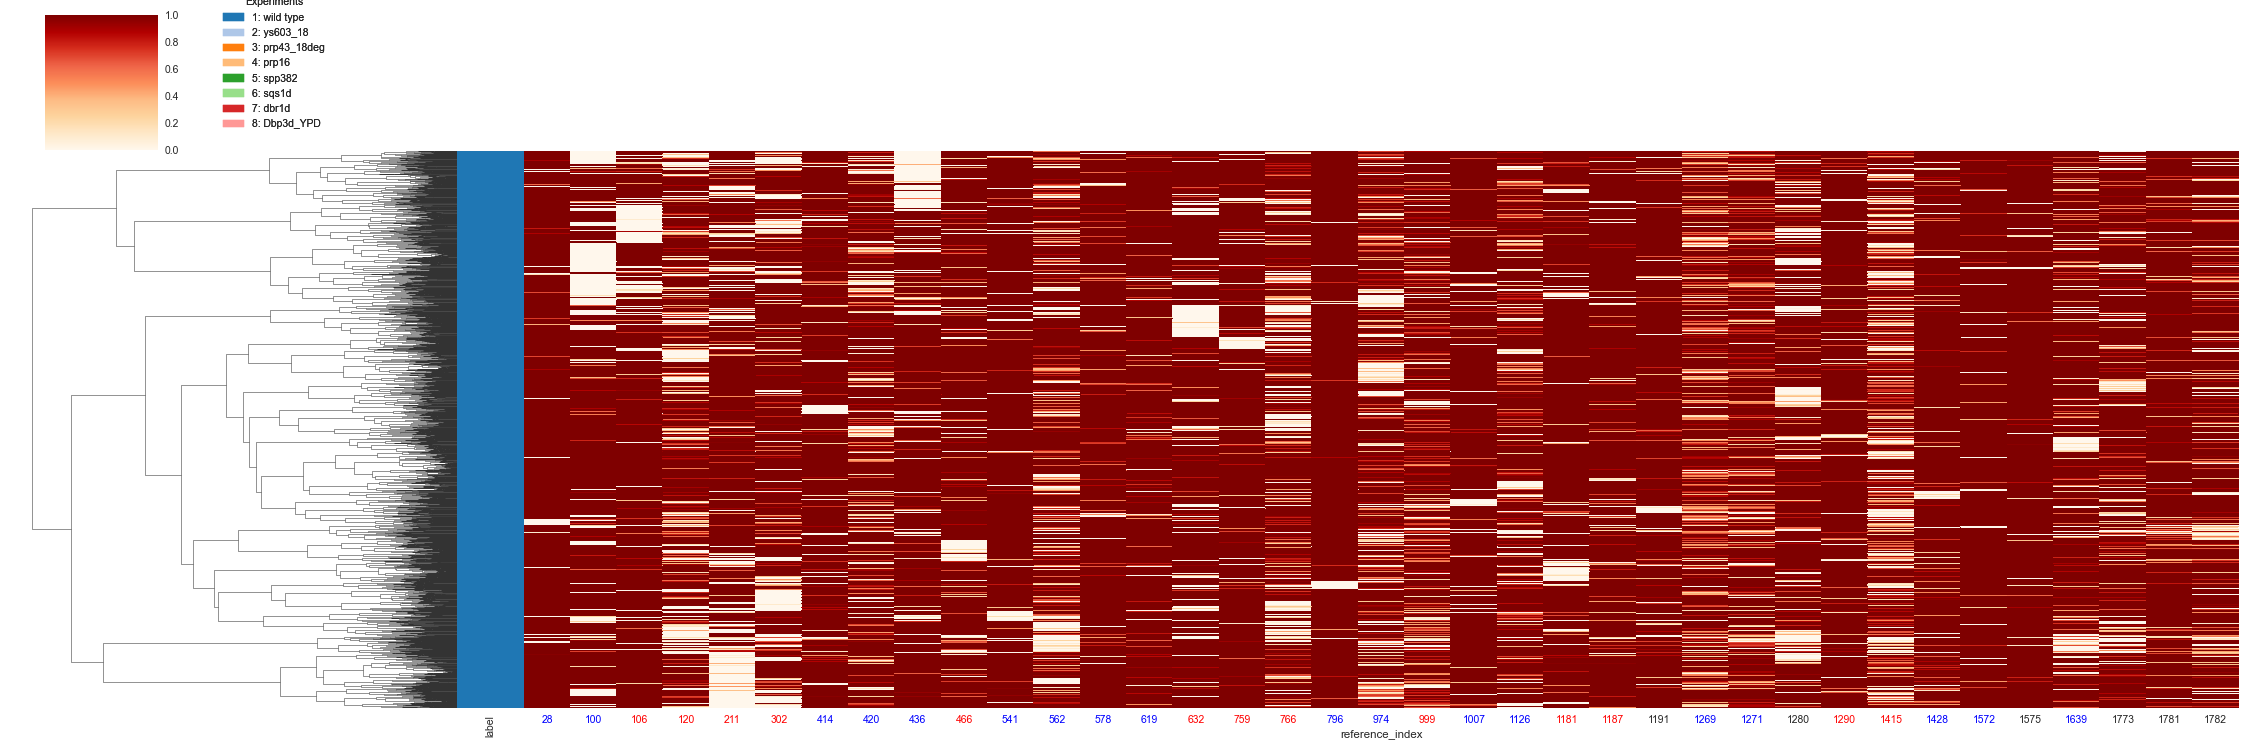

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


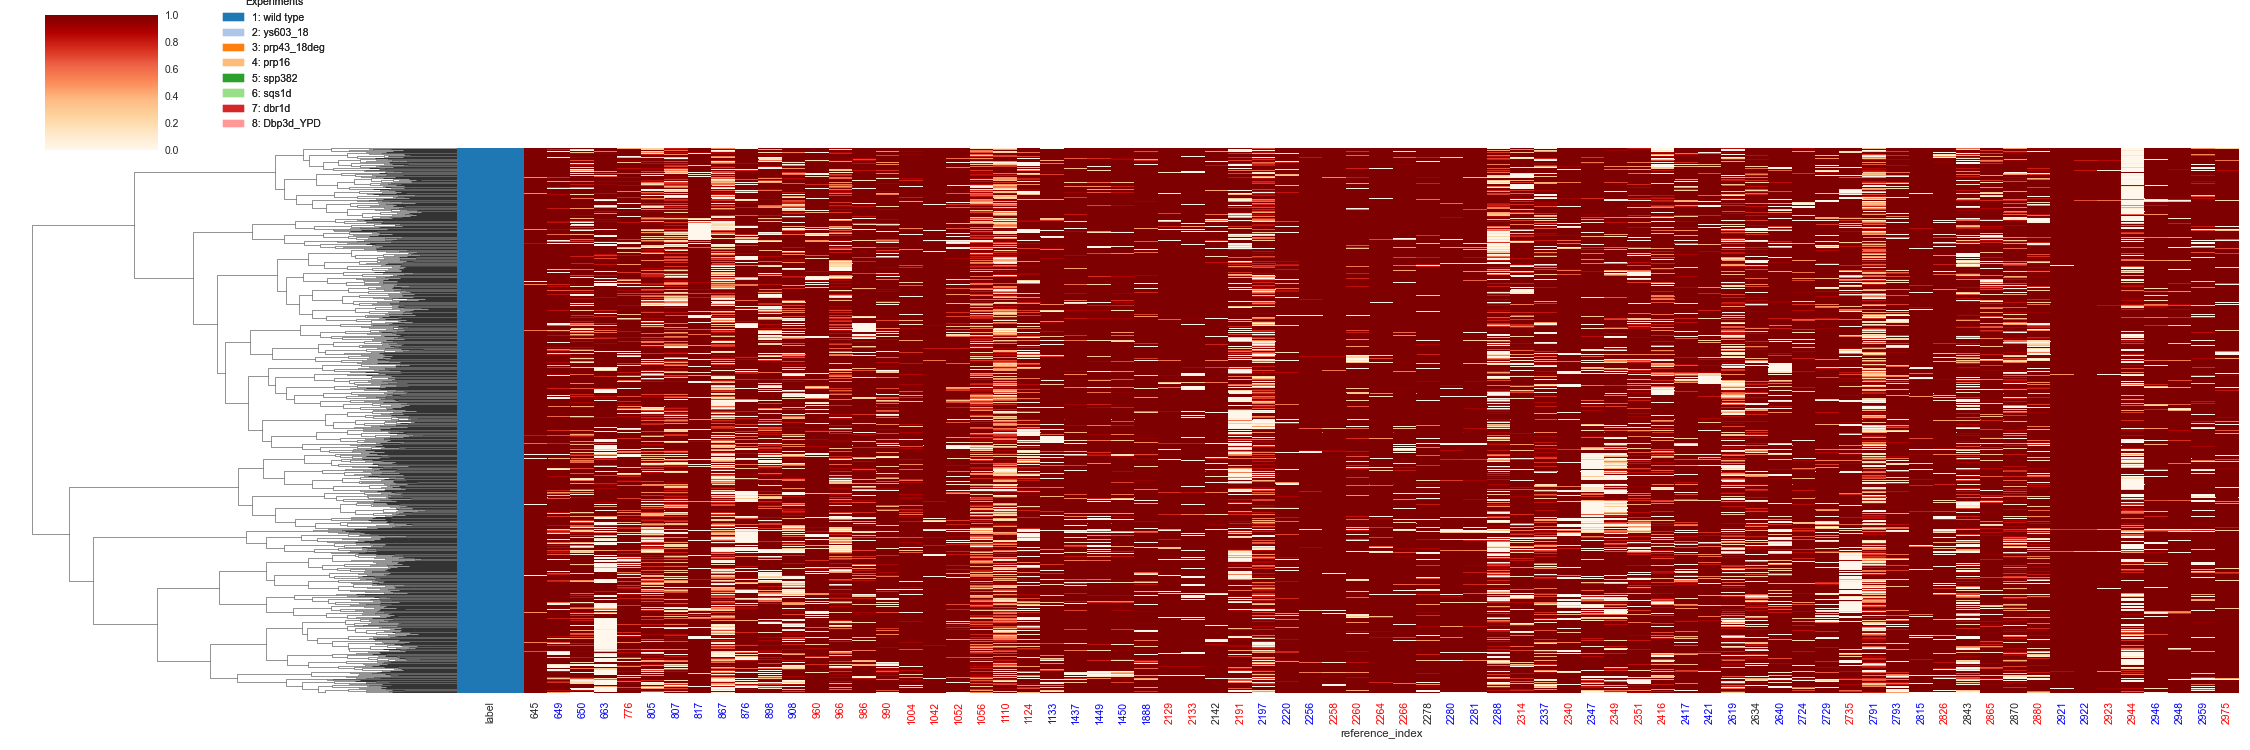

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


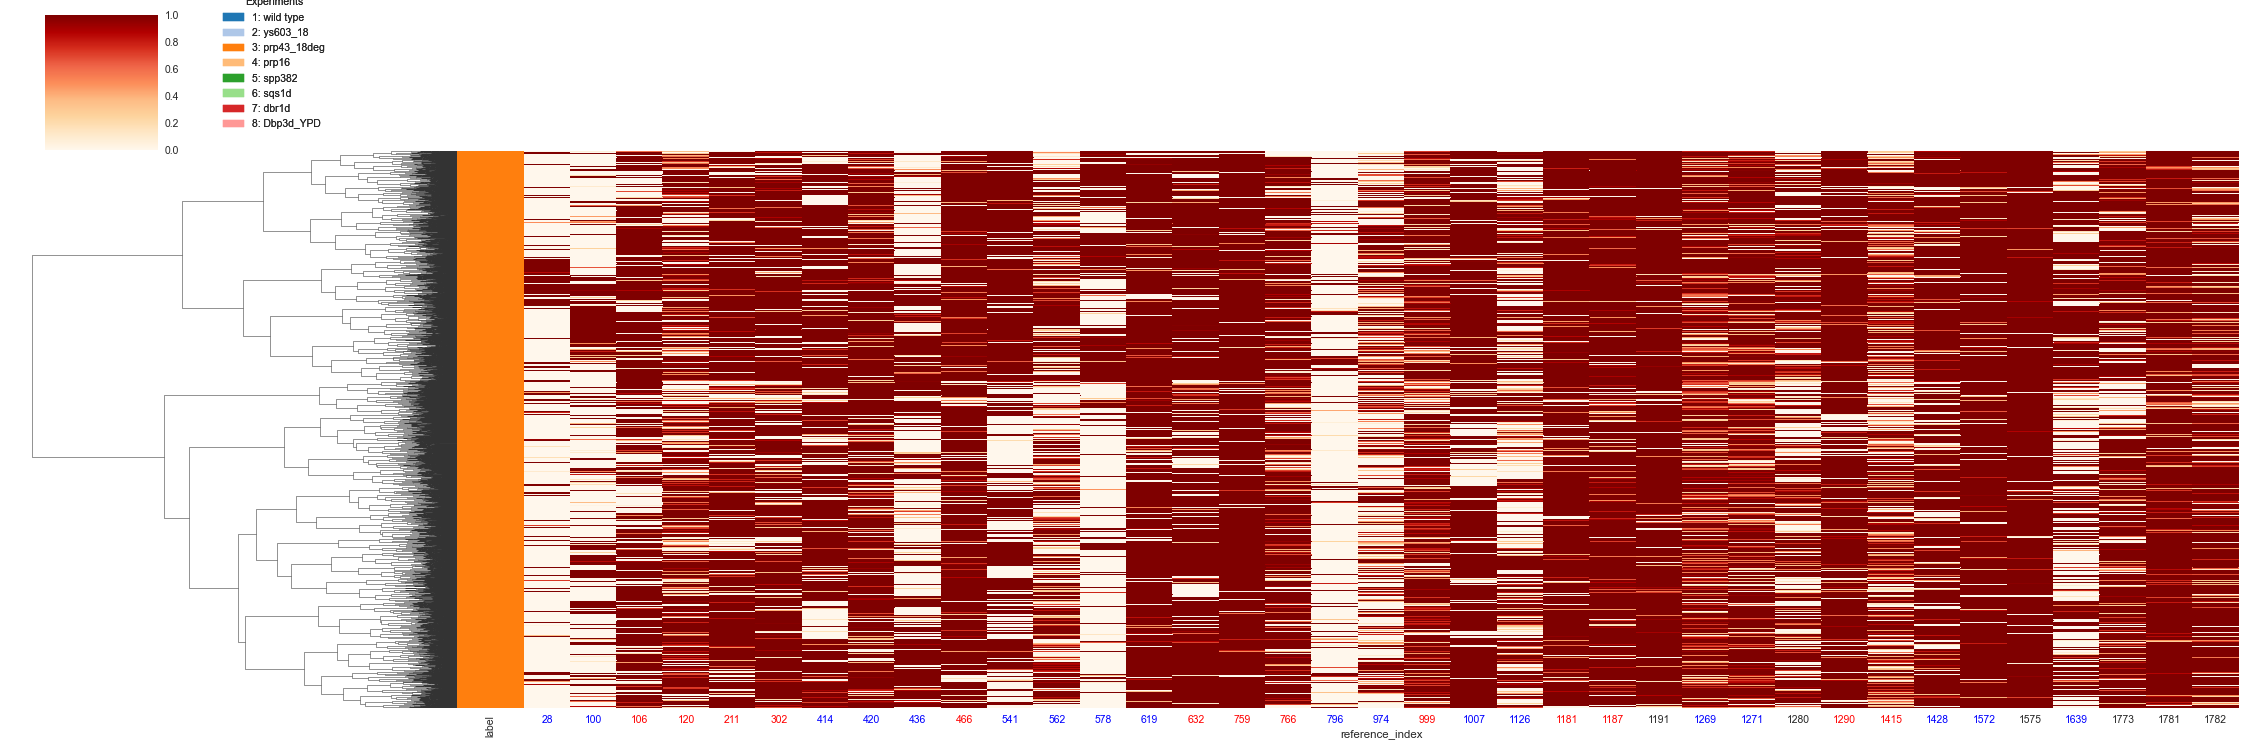

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


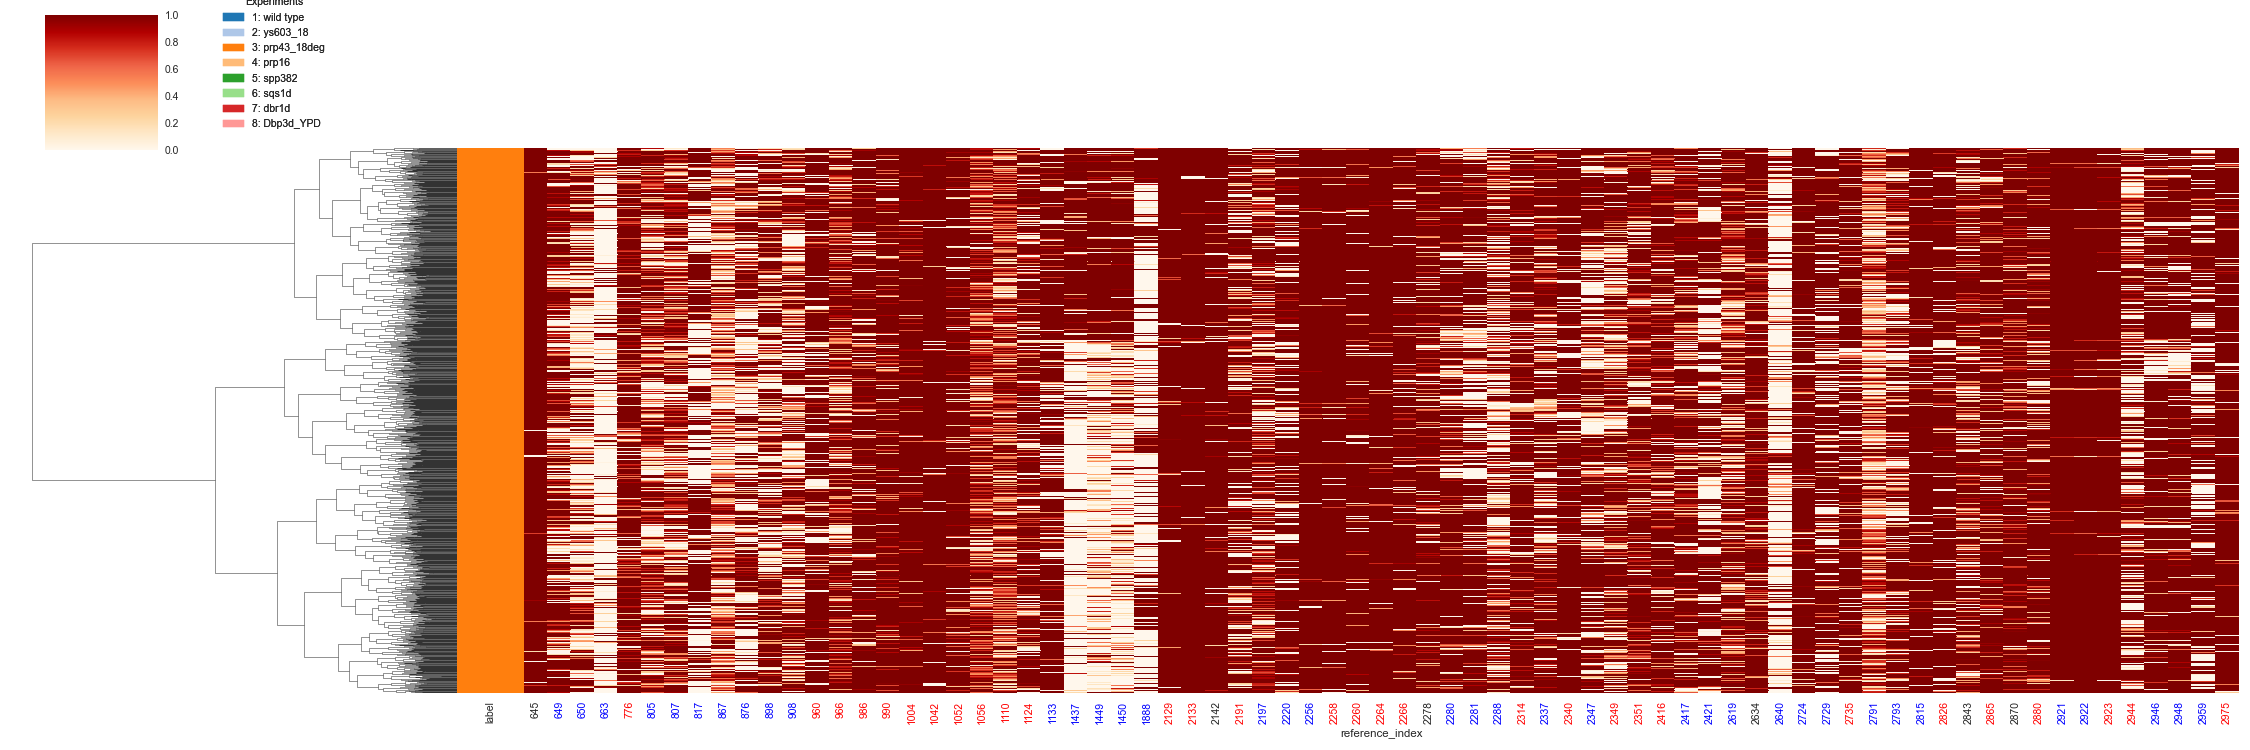

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


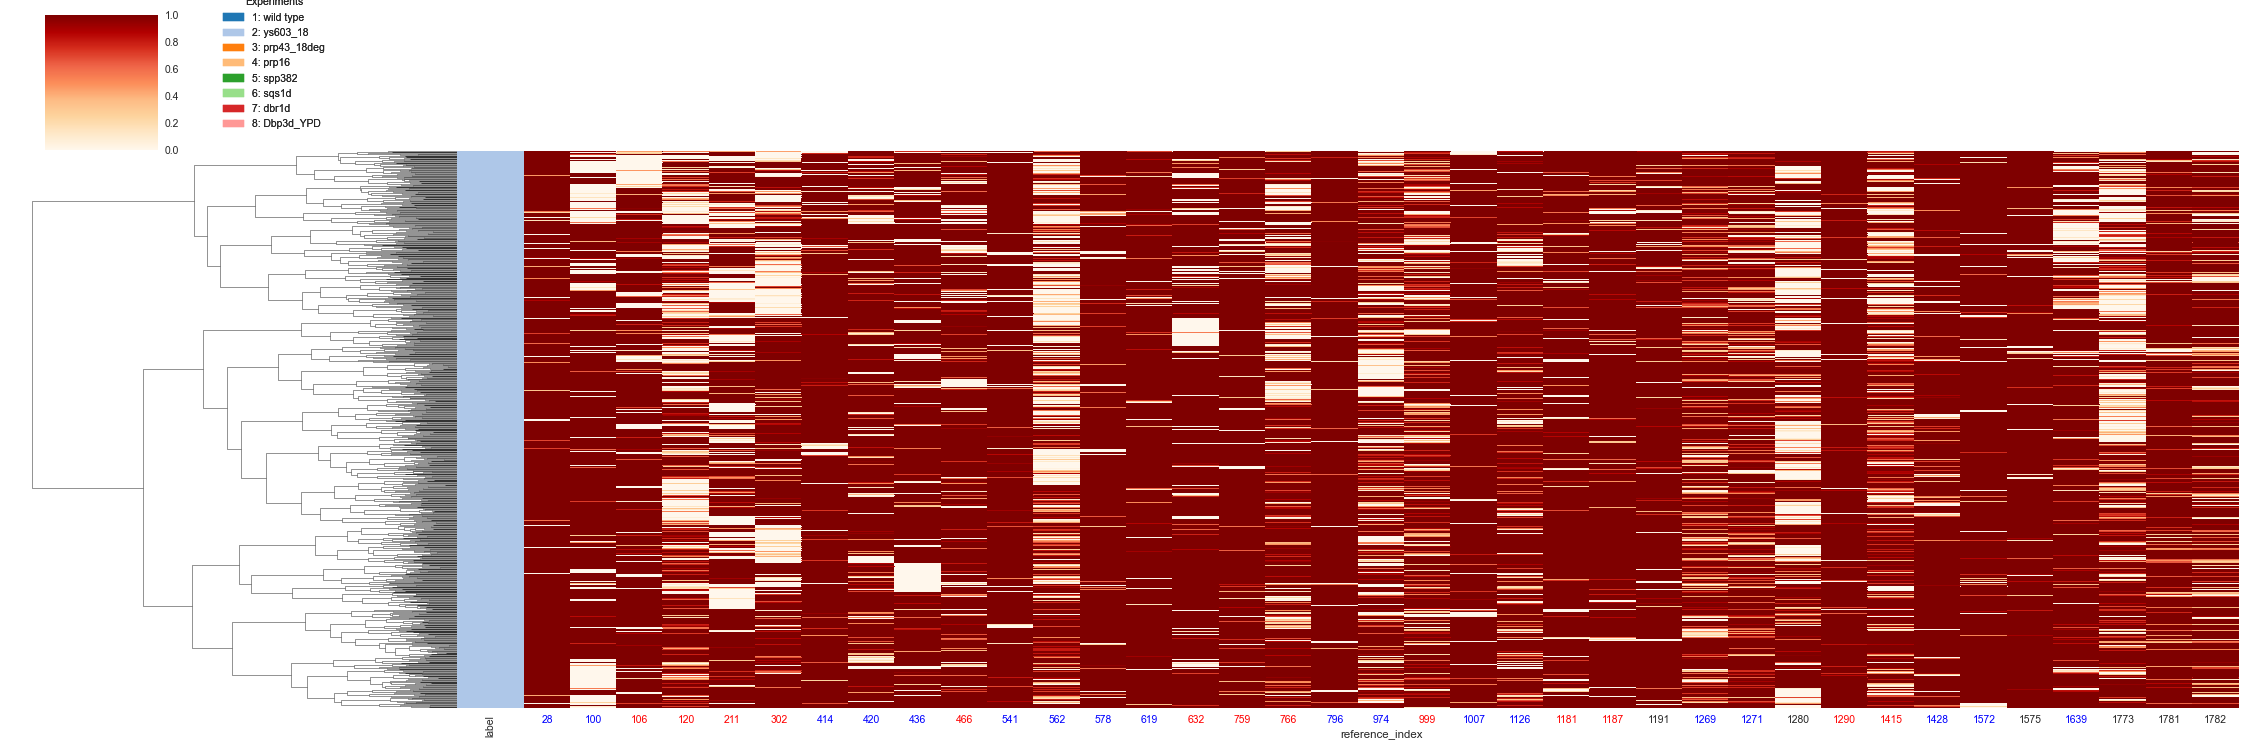

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


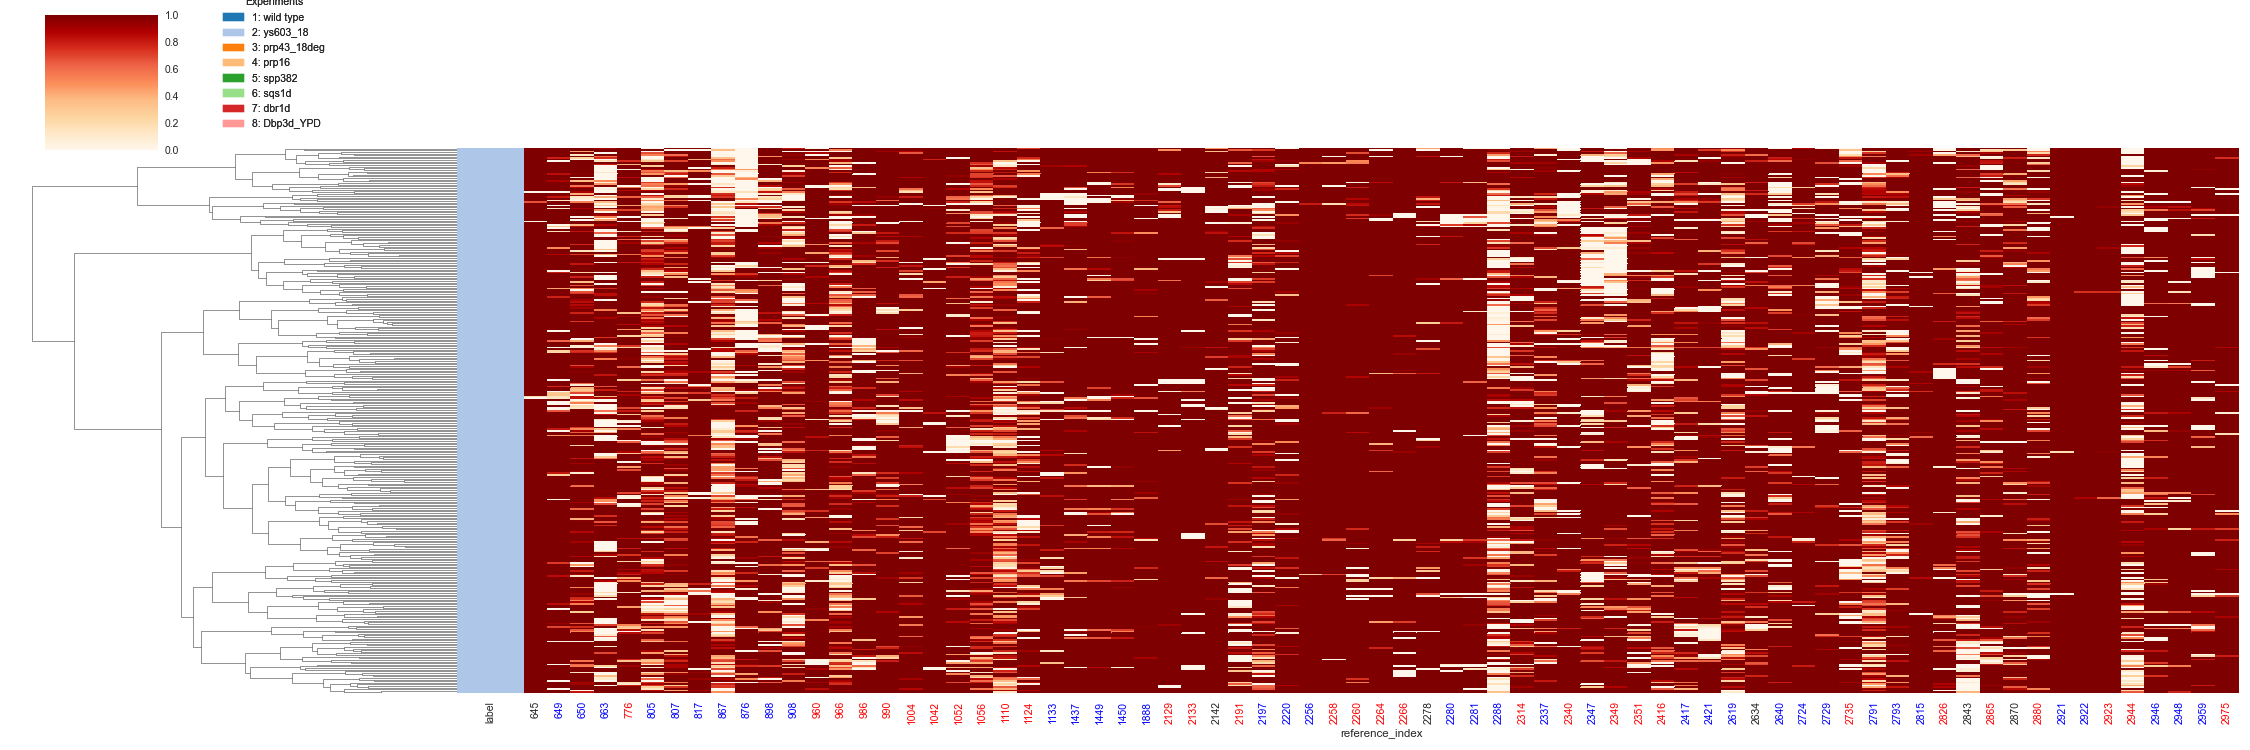

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


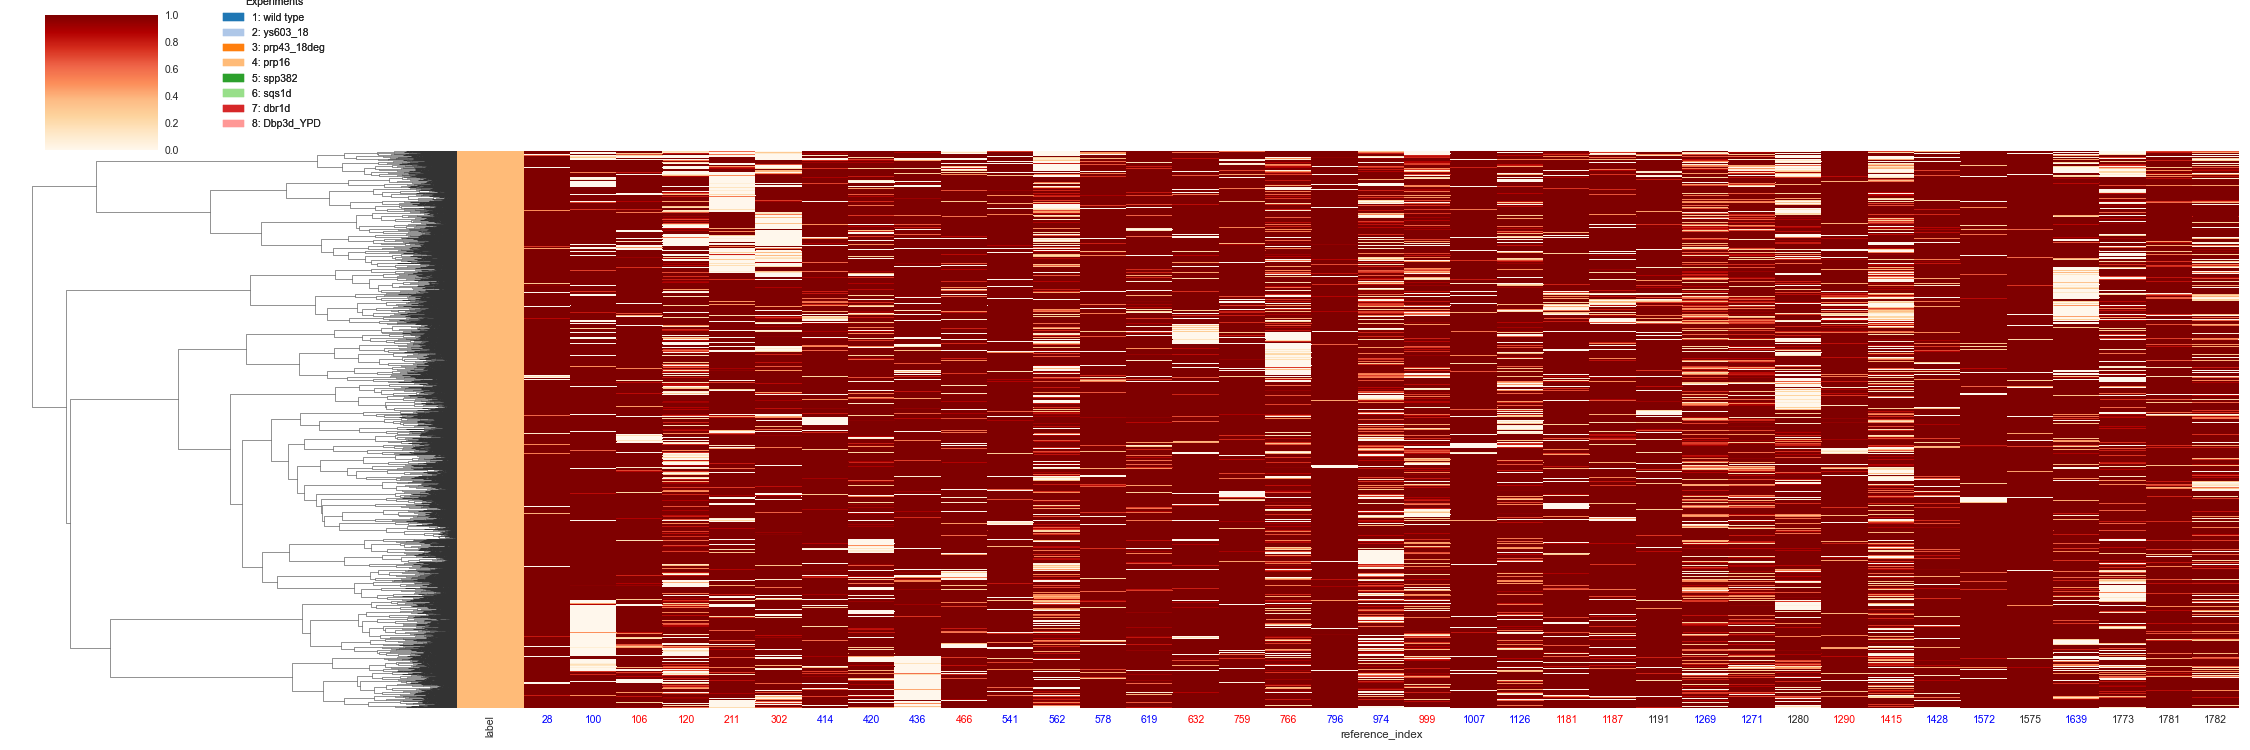

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


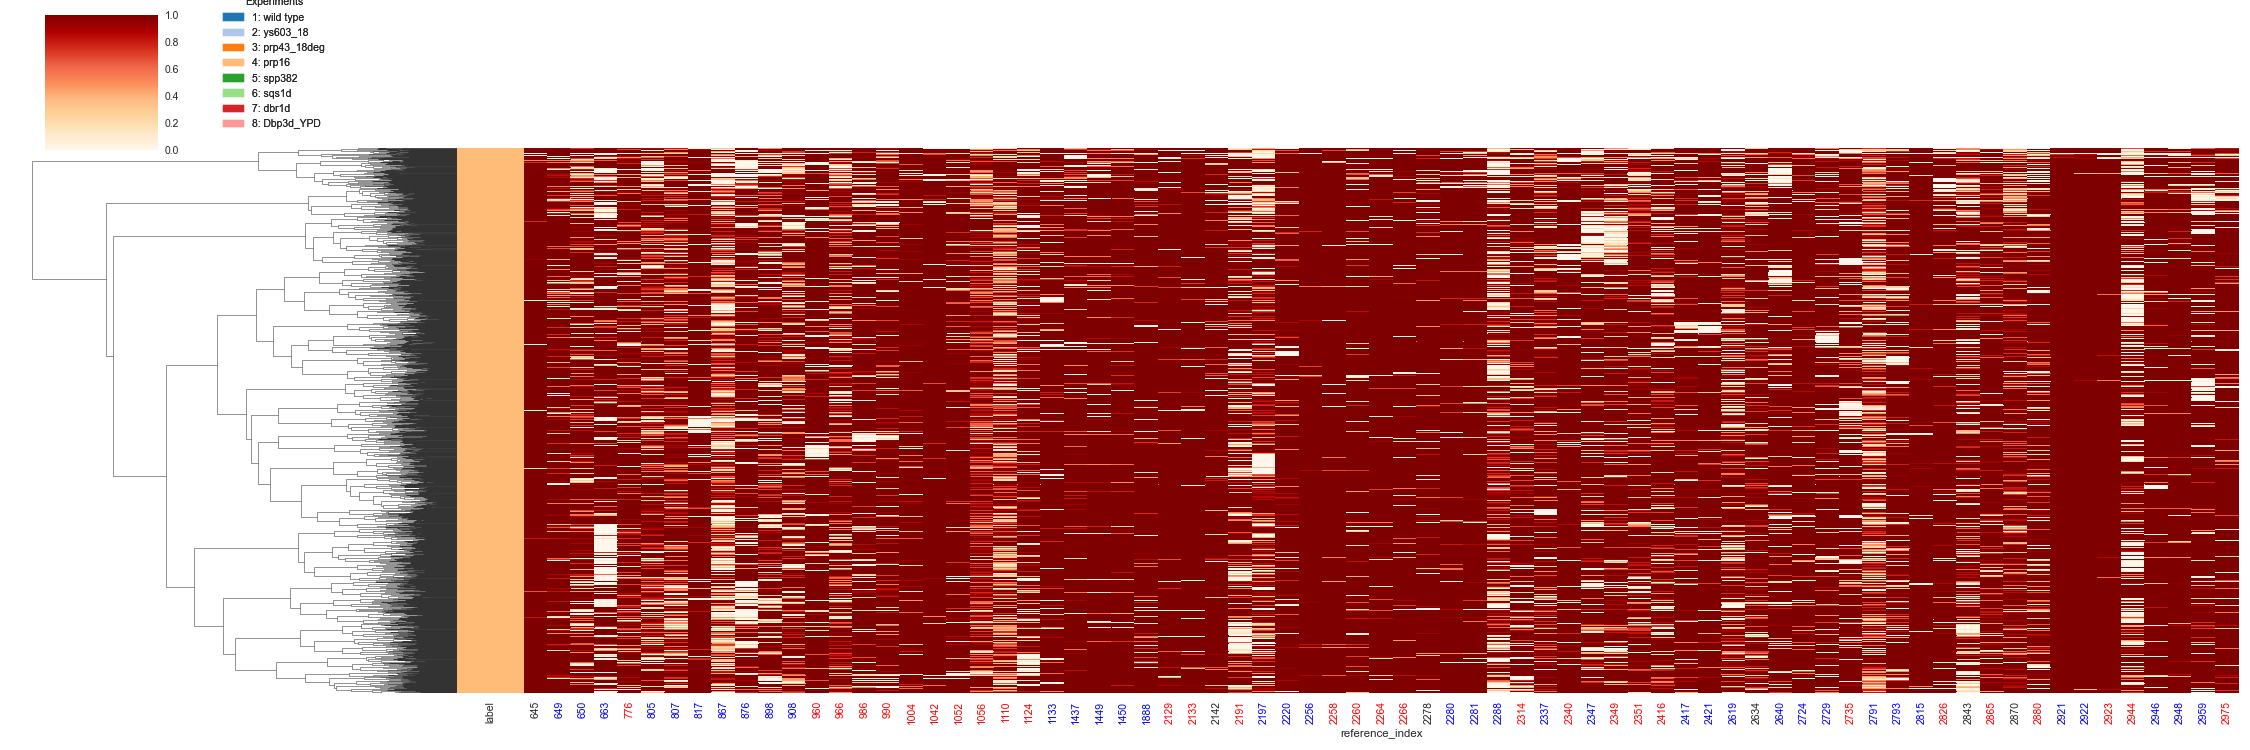

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


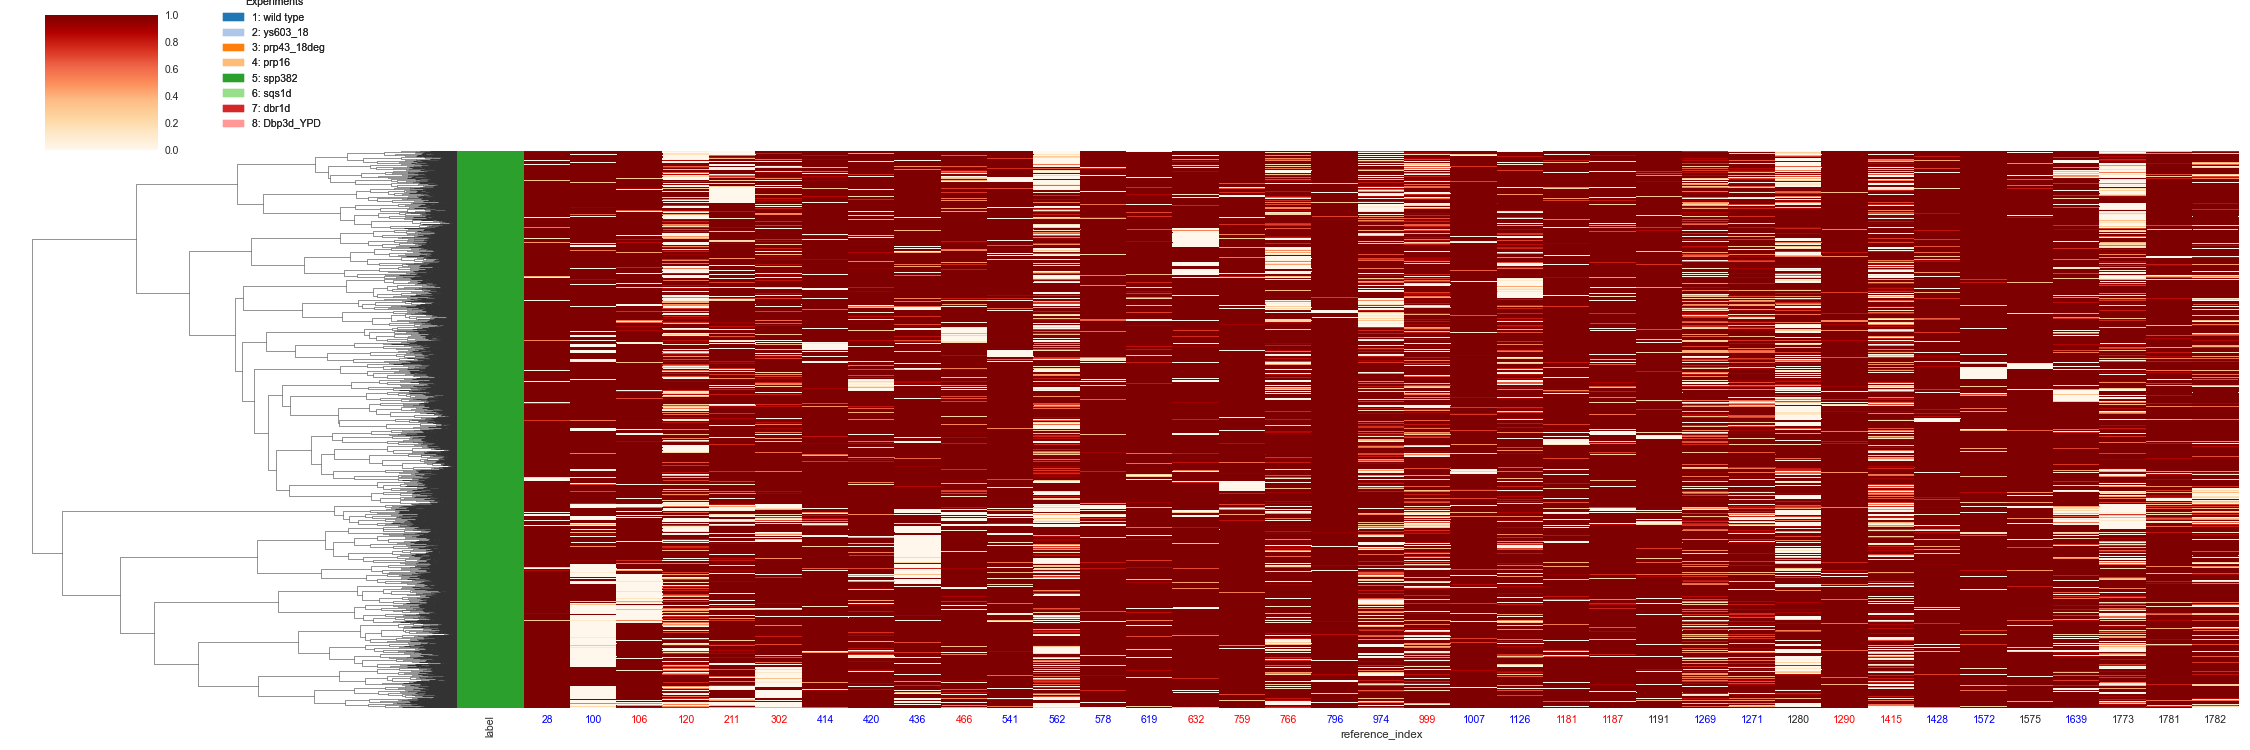

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


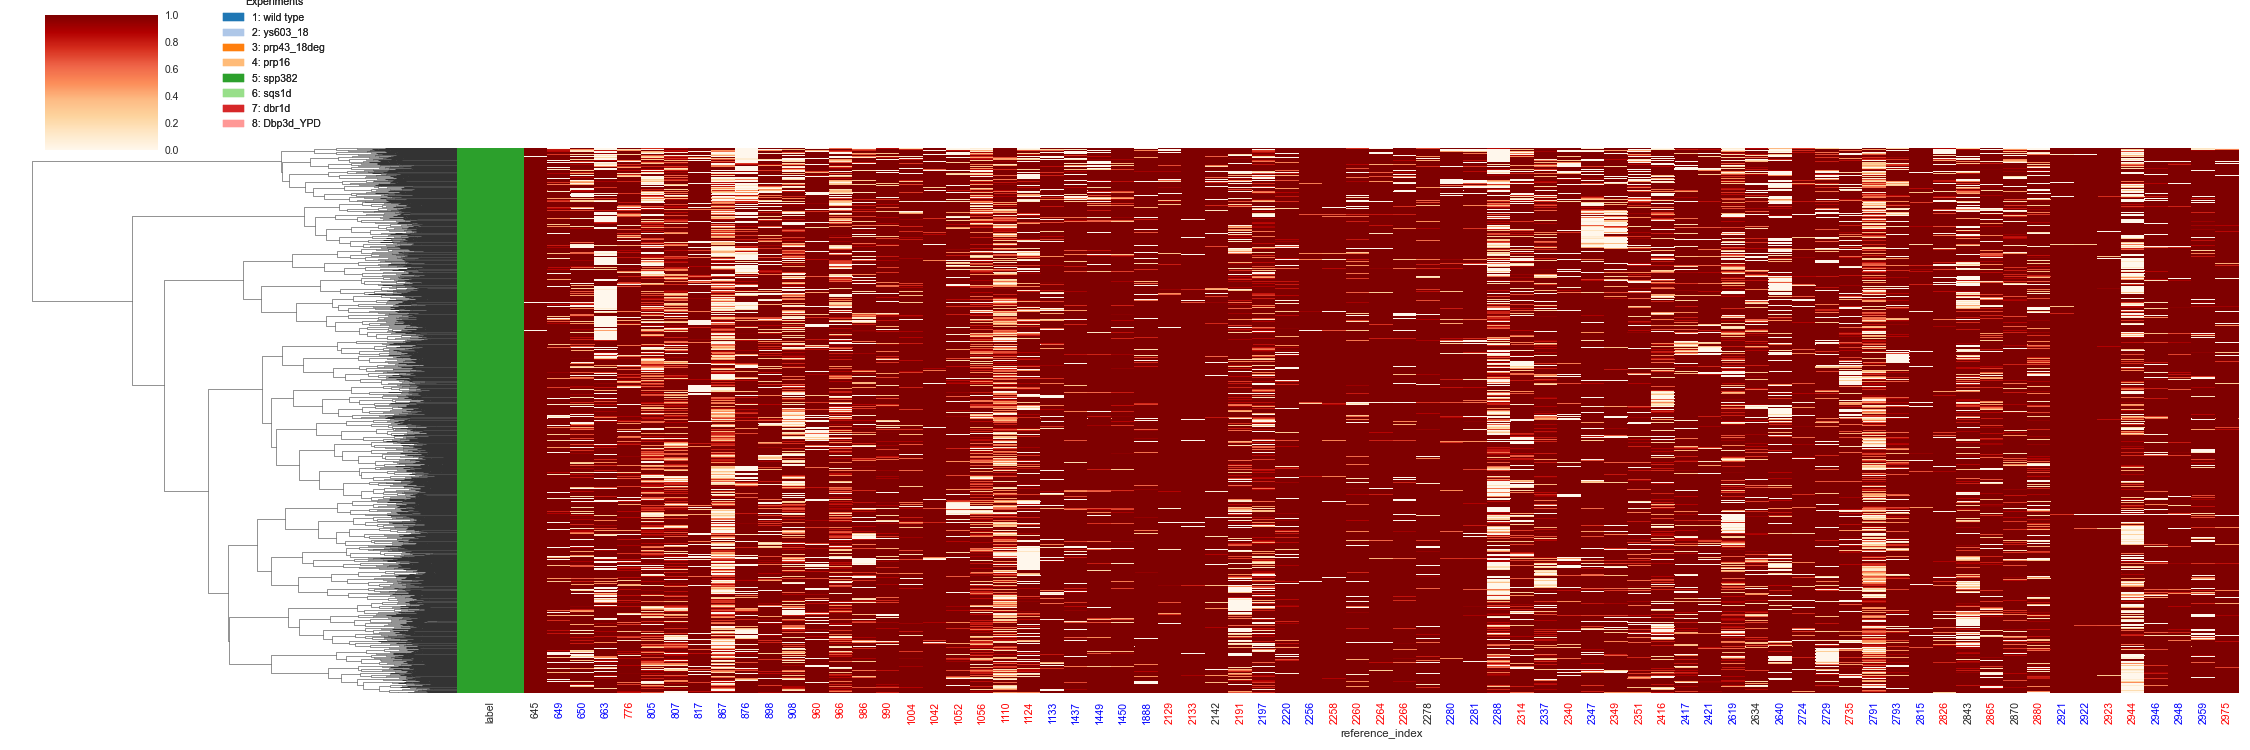

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


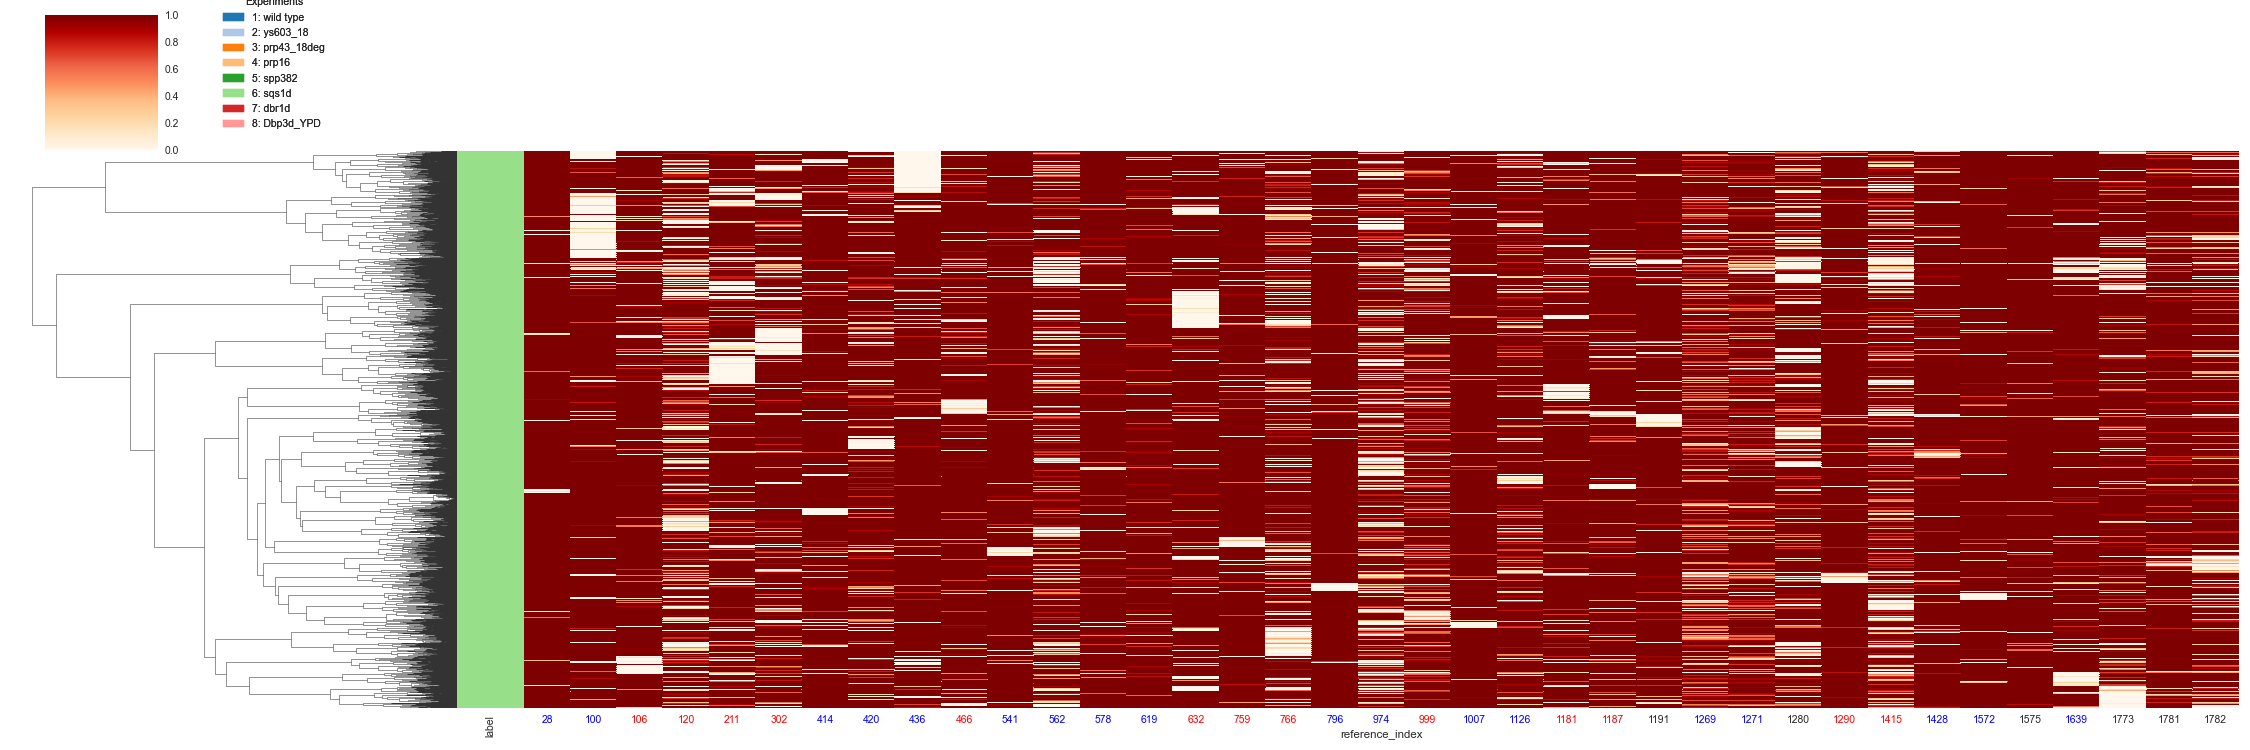

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


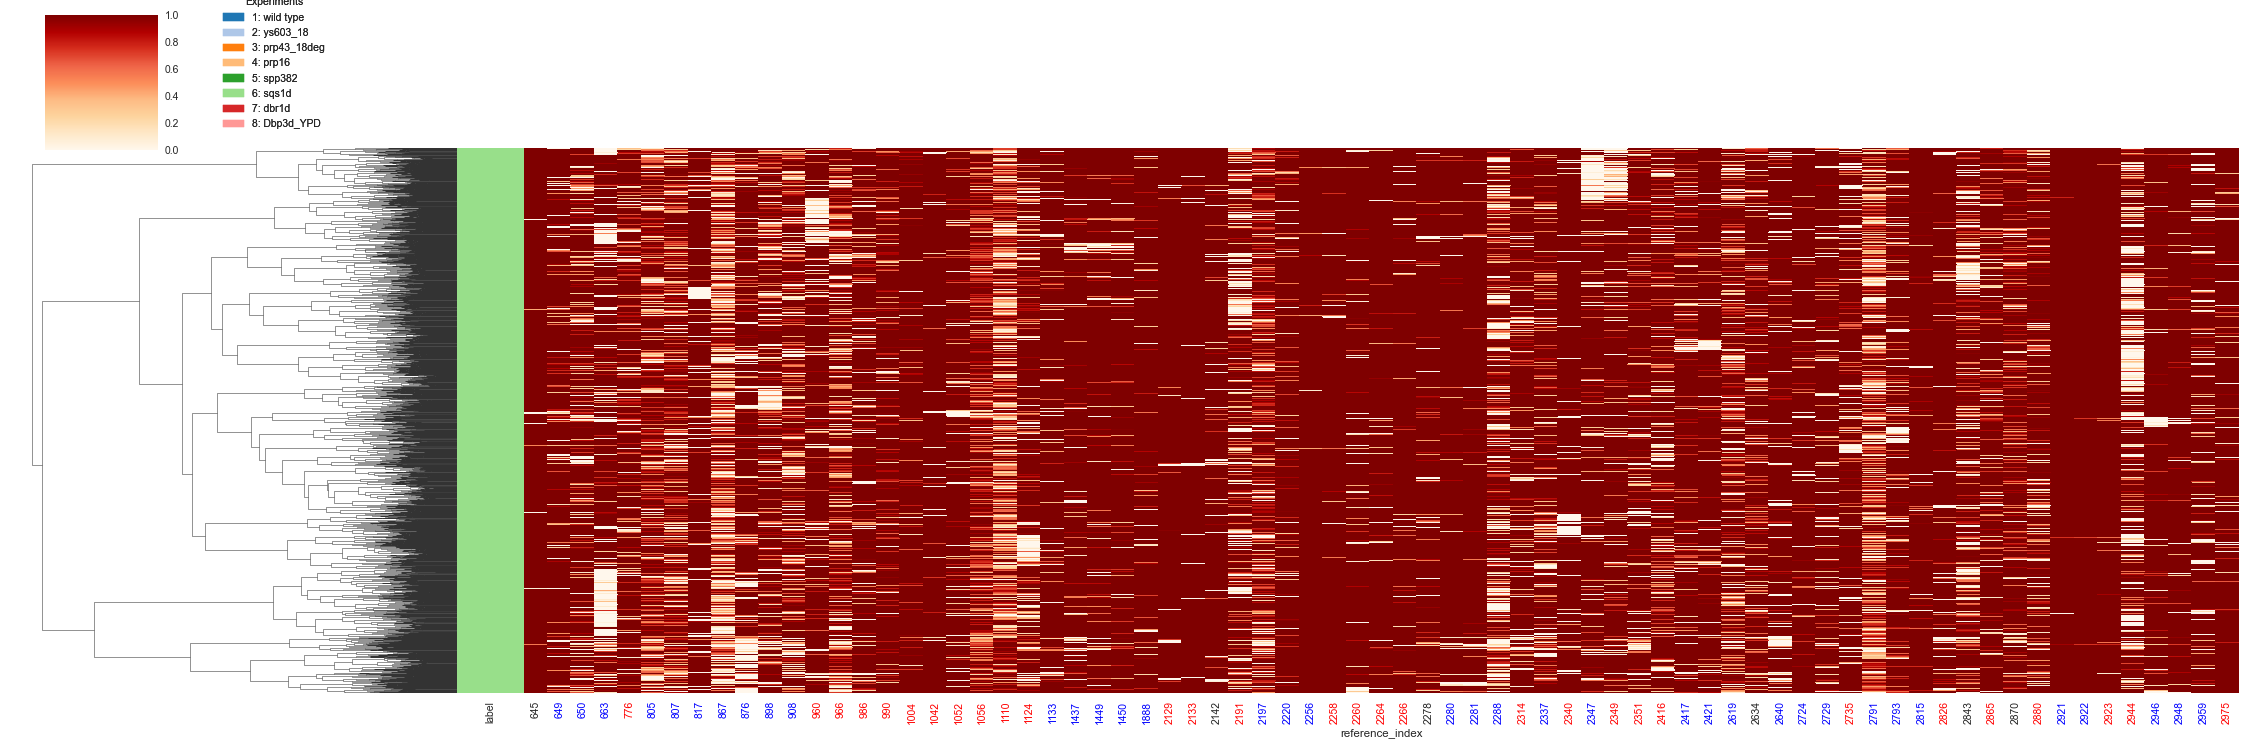

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


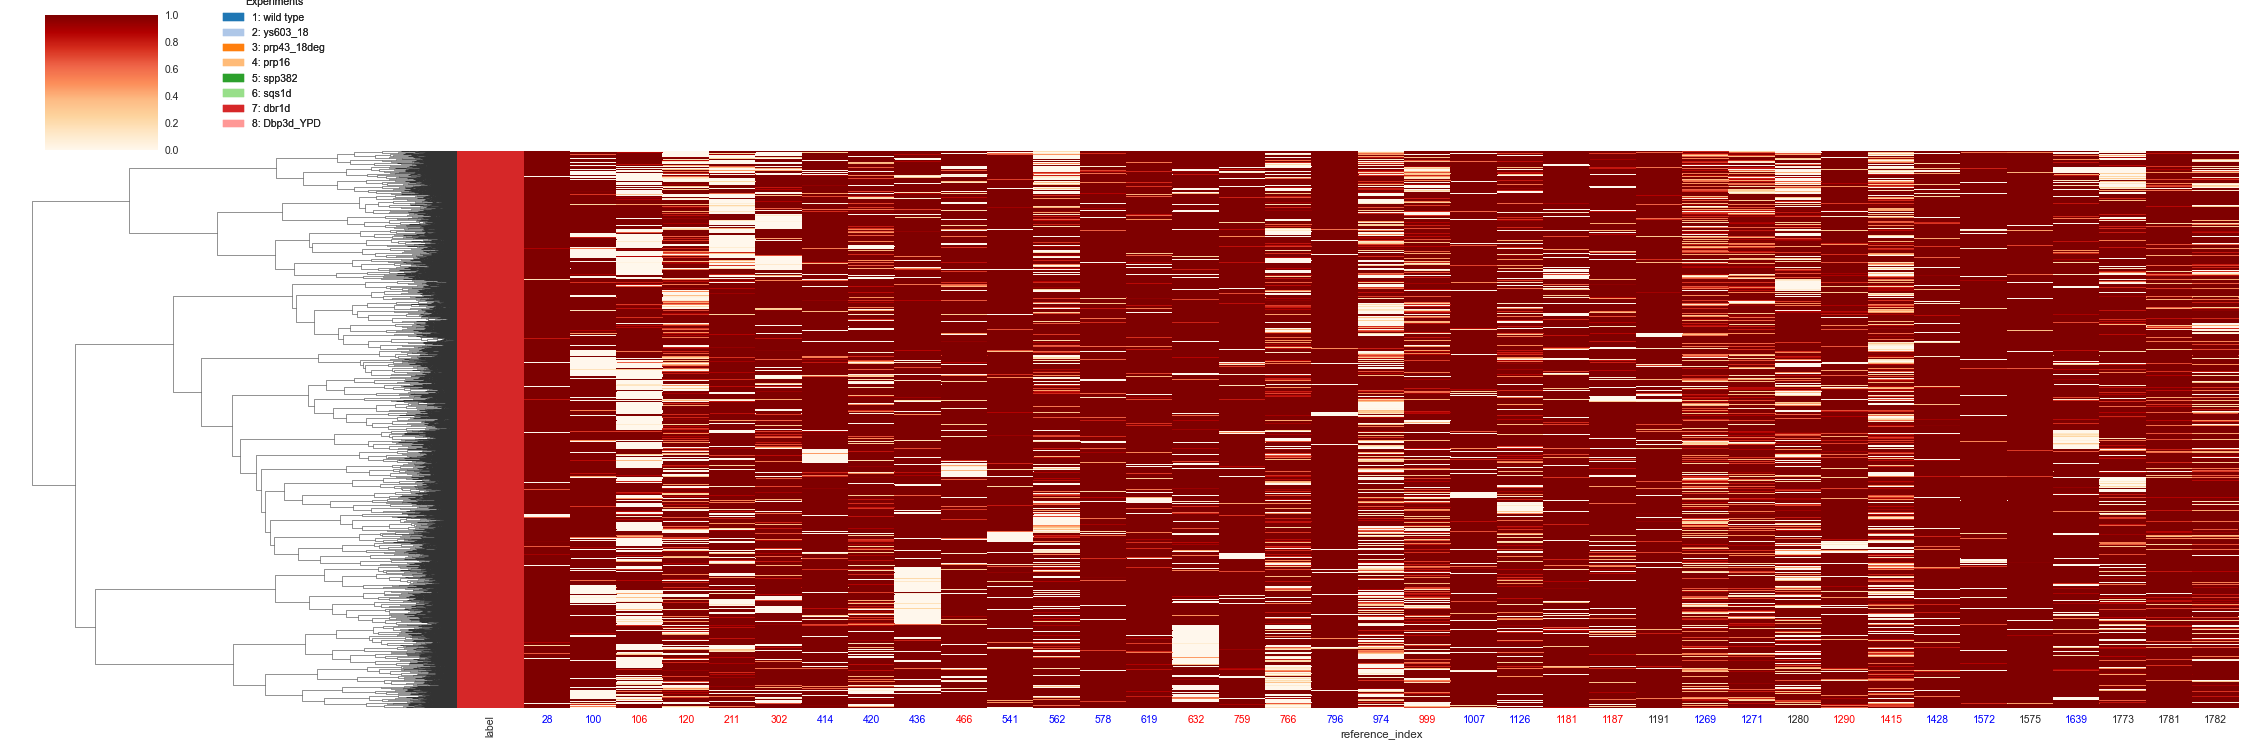

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


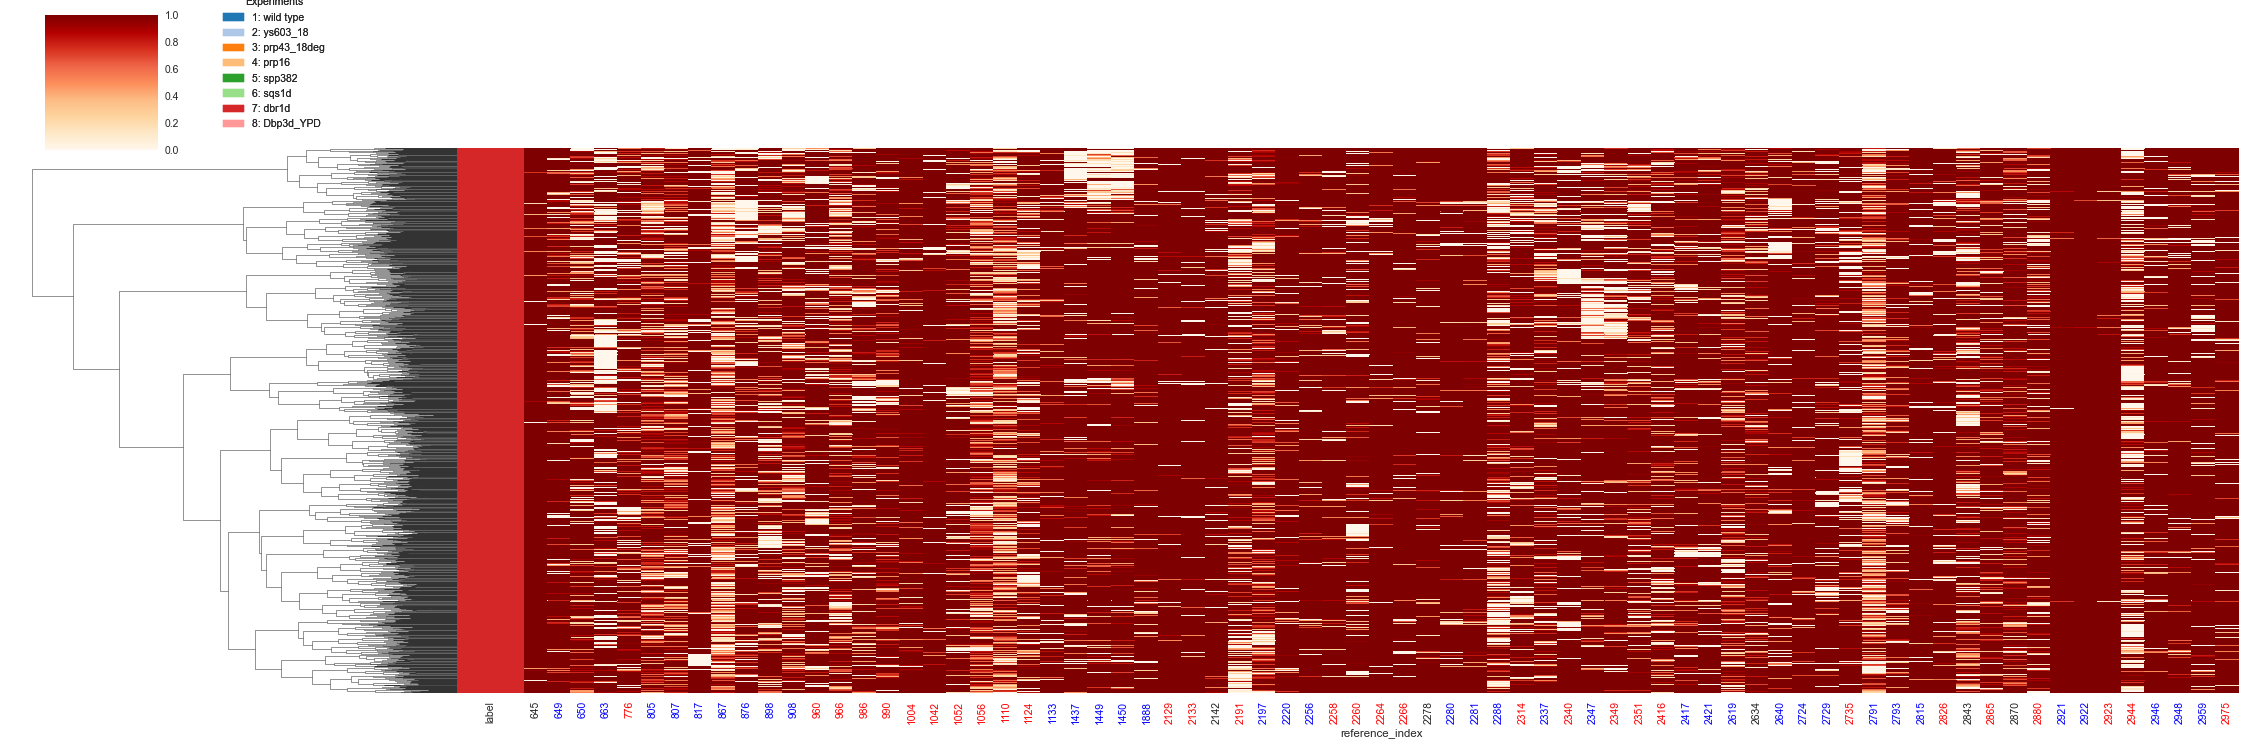

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


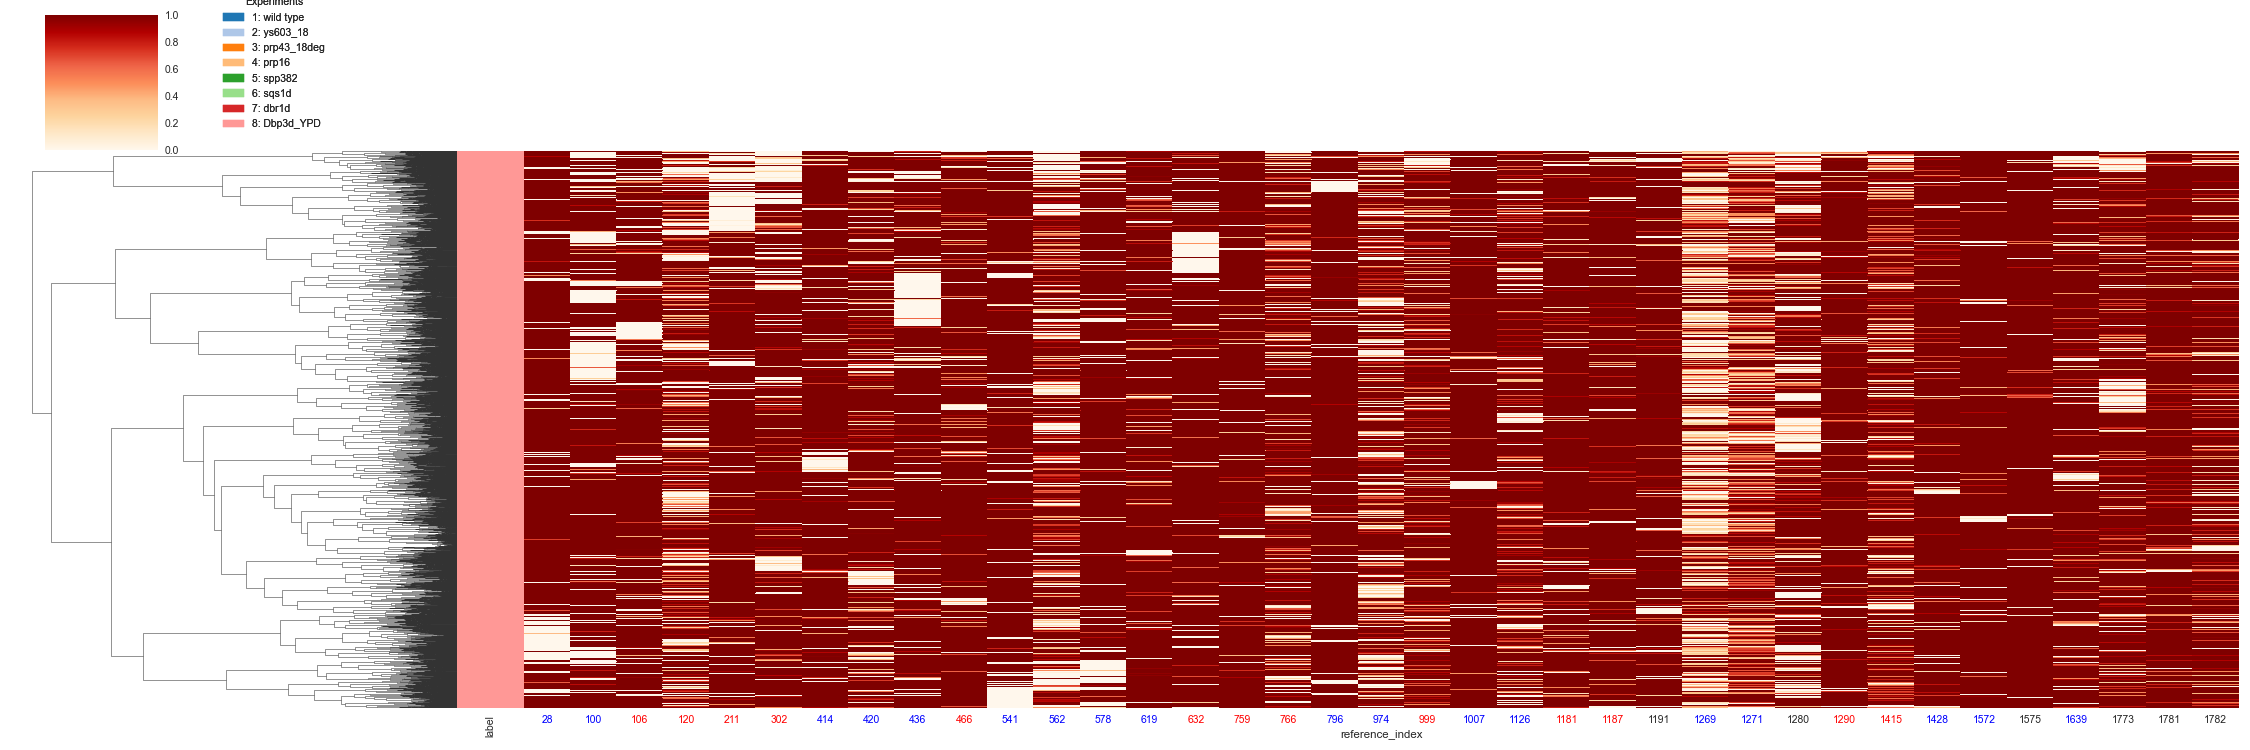

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


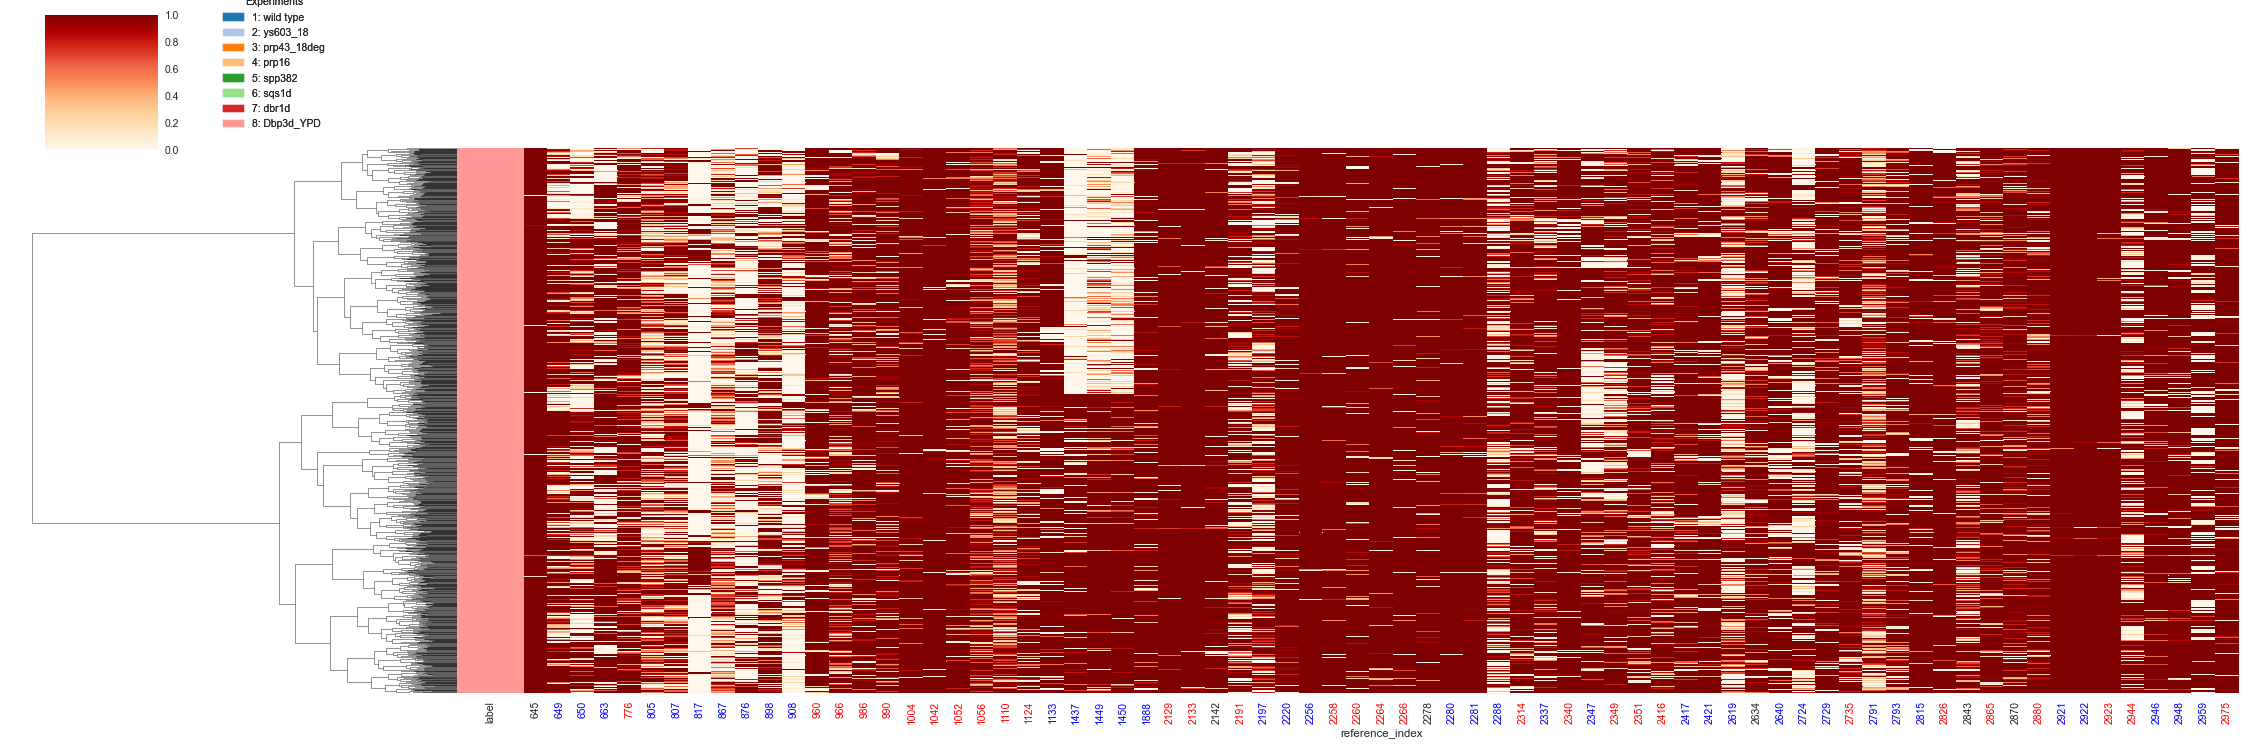

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [11]:
# output_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/summary_data/"
# output_path = "/Users/andrewbailey/Desktop/recent_experiments/"

# vc.plot_all_heatmap_dendrograms(output_path, figsize=(30, 10))


In [ ]:
# from IPython.display import set_matplotlib_formats
# %matplotlib inline
# set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'
# # %matplotlib notebook

# contig = 'RDN25-1'
# n_components = 2
# n = 1000
# save_fig_path = None
# legend = False
# other_params = {"alpha": 0.8, "s":15}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_umap_wt_ivt_deps.png"
# vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, legend=legend, **other_params)   

<IPython.core.display.Javascript object>


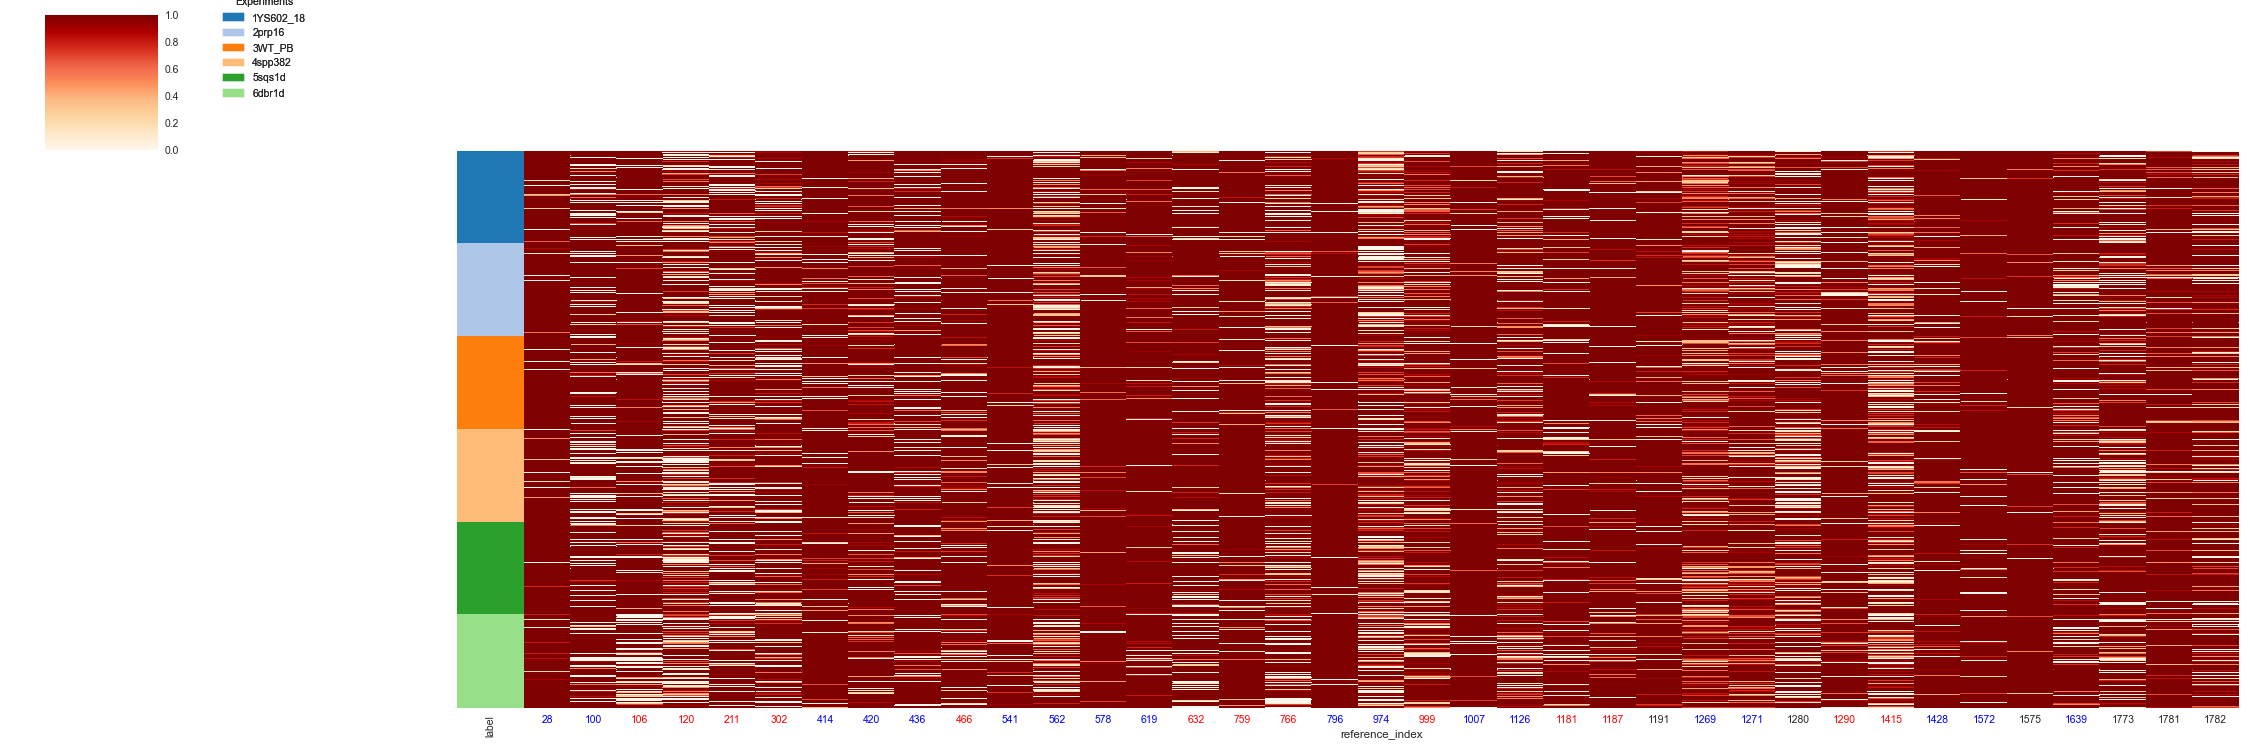

In [16]:
# from IPython.display import set_matplotlib_formats
# %matplotlib inline
# set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'

%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_knockouts_wt.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_wt_prp43.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{contig}_dendrogram_all.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_dendrogram_wt_ivt_deps.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_heatmap_all.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_numbers.svg"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_mix.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_all.png"
# save_fig_path = f"/Users/andrewbailey/Desktop/recent_experiments_{contig}_dendrogram_all.png"

g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                               metric=metric,
                               method=method, 
                               label=label
                               col_cluster=False,
                               row_cluster=False,
                               twoprimeo_pos=twoprimeo_pos,
                               pseduo_u_pos=pseduo_u_pos,
                              legend=legend,
                              figsize=figsize)


In [ ]:
contig = 'RDN18-1'
n_components = 2
n = 1000
save_fig_path = None
legend = True
other_params = {"alpha": 0.5, "s": 30}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_umap_most1.png"
# save_fig_path = None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

In [ ]:
contig = 'RDN25-1'
n_components = 2
n = 1000
save_fig_path = None
legend = True
other_params = {"alpha": 0.5, "s": 30}
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_umap_most1.png"
# save_fig_path = None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

In [ ]:
contig = 'RDN18-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), cmap=cmap, norm=norm, figure_path=save_fig_path)


## Depletion Plots

In [ ]:
# depletions 1
all_file_paths = [WT_YPD, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, ivt_path]
all_labels = ["1: wild type", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion", "4: ivt"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


In [ ]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = False
method="ward"
contigs = ['RDN18-1', "RDN25-1"]

for contig in contigs:
    save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_dendrogram_depletions.png"

    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                               metric=metric,
                               method=method, 
                               col_cluster=False,
                               row_cluster=True,
                               twoprimeo_pos=twoprimeo_pos,
                               pseduo_u_pos=pseduo_u_pos,
                              legend=legend,
                              figsize=figsize)


In [ ]:
contigs = ['RDN18-1', "RDN25-1"]
n_components = 2
n = 1000
save_fig_path = None
legend = False
other_params = {"alpha": 0.5, "s": 30}

for contig in contigs:
    save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_depletions_umap.png"
    vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

In [ ]:
for contig in contigs:
    for experiment in all_labels:
        save_fig_path = None
        save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_{experiment}_depletion_correlation.png"
        cmap = "hot"
        cmap = "Blues"
        cmap = "RdBu"
        pseudou="ql"
        stat = "r2"
        stat = "pearson"
        twoprimeo=["na", "ob", "pc", "qd"]
        X = vc.get_X(contig, vc.get_contig_positions(contig), label=experiment)
        vc._plot_ld_heatmap(X, stat=stat, cmap=cmap, figure_path=save_fig_path, vmax=1, vmin=-1)


## snoRNA knockouts

In [ ]:
# knockouts
all_file_paths = [WT_YPD, mix, YWD448a, YWD451a, YWD452a]
all_labels = ["1: wild type", "2: mix", "3: 448a", "4: 451a", "5: 452a"]
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")
contigs = ['RDN18-1', "RDN25-1"]


In [ ]:
%matplotlib notebook

n = 500
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = False
method="ward"
contigs = ['RDN18-1', "RDN25-1"]

for contig in contigs:
#     save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_heatmap_snoKO.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                               metric=metric,
                               method=method, 
                               col_cluster=False,
                               row_cluster=False,
                               twoprimeo_pos=twoprimeo_pos,
                               pseduo_u_pos=pseduo_u_pos,
                              legend=legend,
                              figsize=figsize)


In [ ]:
%matplotlib notebook

n = 500
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = False
method="ward"
contigs = ['RDN18-1', "RDN25-1"]

for contig in contigs:
#     save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_snoKO.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                               metric=metric,
                               method=method, 
                               col_cluster=False,
                               row_cluster=True,
                               twoprimeo_pos=twoprimeo_pos,
                               pseduo_u_pos=pseduo_u_pos,
                              legend=legend,
                              figsize=figsize)
#     save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_mix.png"
    X = vc.get_X(contig, vc.get_contig_positions(contig), label="2: mix")
    vc._plot_heatmap_dendrogram(X, figure_path=save_fig_path,
                               metric=metric,
                               method=method, 
                               col_cluster=False,
                               row_cluster=True,
                               twoprimeo_pos=twoprimeo_pos,
                               pseduo_u_pos=pseduo_u_pos,
                              legend=legend,
                              figsize=figsize)

In [ ]:
n_components = 2
n = 500
save_fig_path = None
legend = False
other_params = {"alpha": 0.8, "s": 30}

for contig in contigs:
    save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_snoKO_umap.png"
    vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

In [ ]:
experiment = "2: mix"
for contig in contigs:
    save_fig_path = None
#     save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_{experiment}_correlation.png"
    cmap = "hot"
    cmap = "Blues"
    cmap = "RdBu"
    pseudou="ql"
    stat = "r2"
    stat = "pearson"
    twoprimeo=["na", "ob", "pc", "qd"]
    X = vc.get_X(contig, vc.get_contig_positions(contig), label=experiment)
    vc._plot_ld_heatmap(X, stat=stat, cmap=cmap, figure_path=save_fig_path, vmax=1, vmin=-1)


In [ ]:
experiment = "2: mix"
contig = "RDN18-1"
X = vc.get_X(contig, vc.get_contig_positions(contig), label=experiment)
print(pearsonr(X[758], X[1289]))
print(pearsonr(X[758], X[1414]))
print(pearsonr(X[758], X[435]))
print(pearsonr(X[1289], X[1414]))
